### 스튜던트 t분포

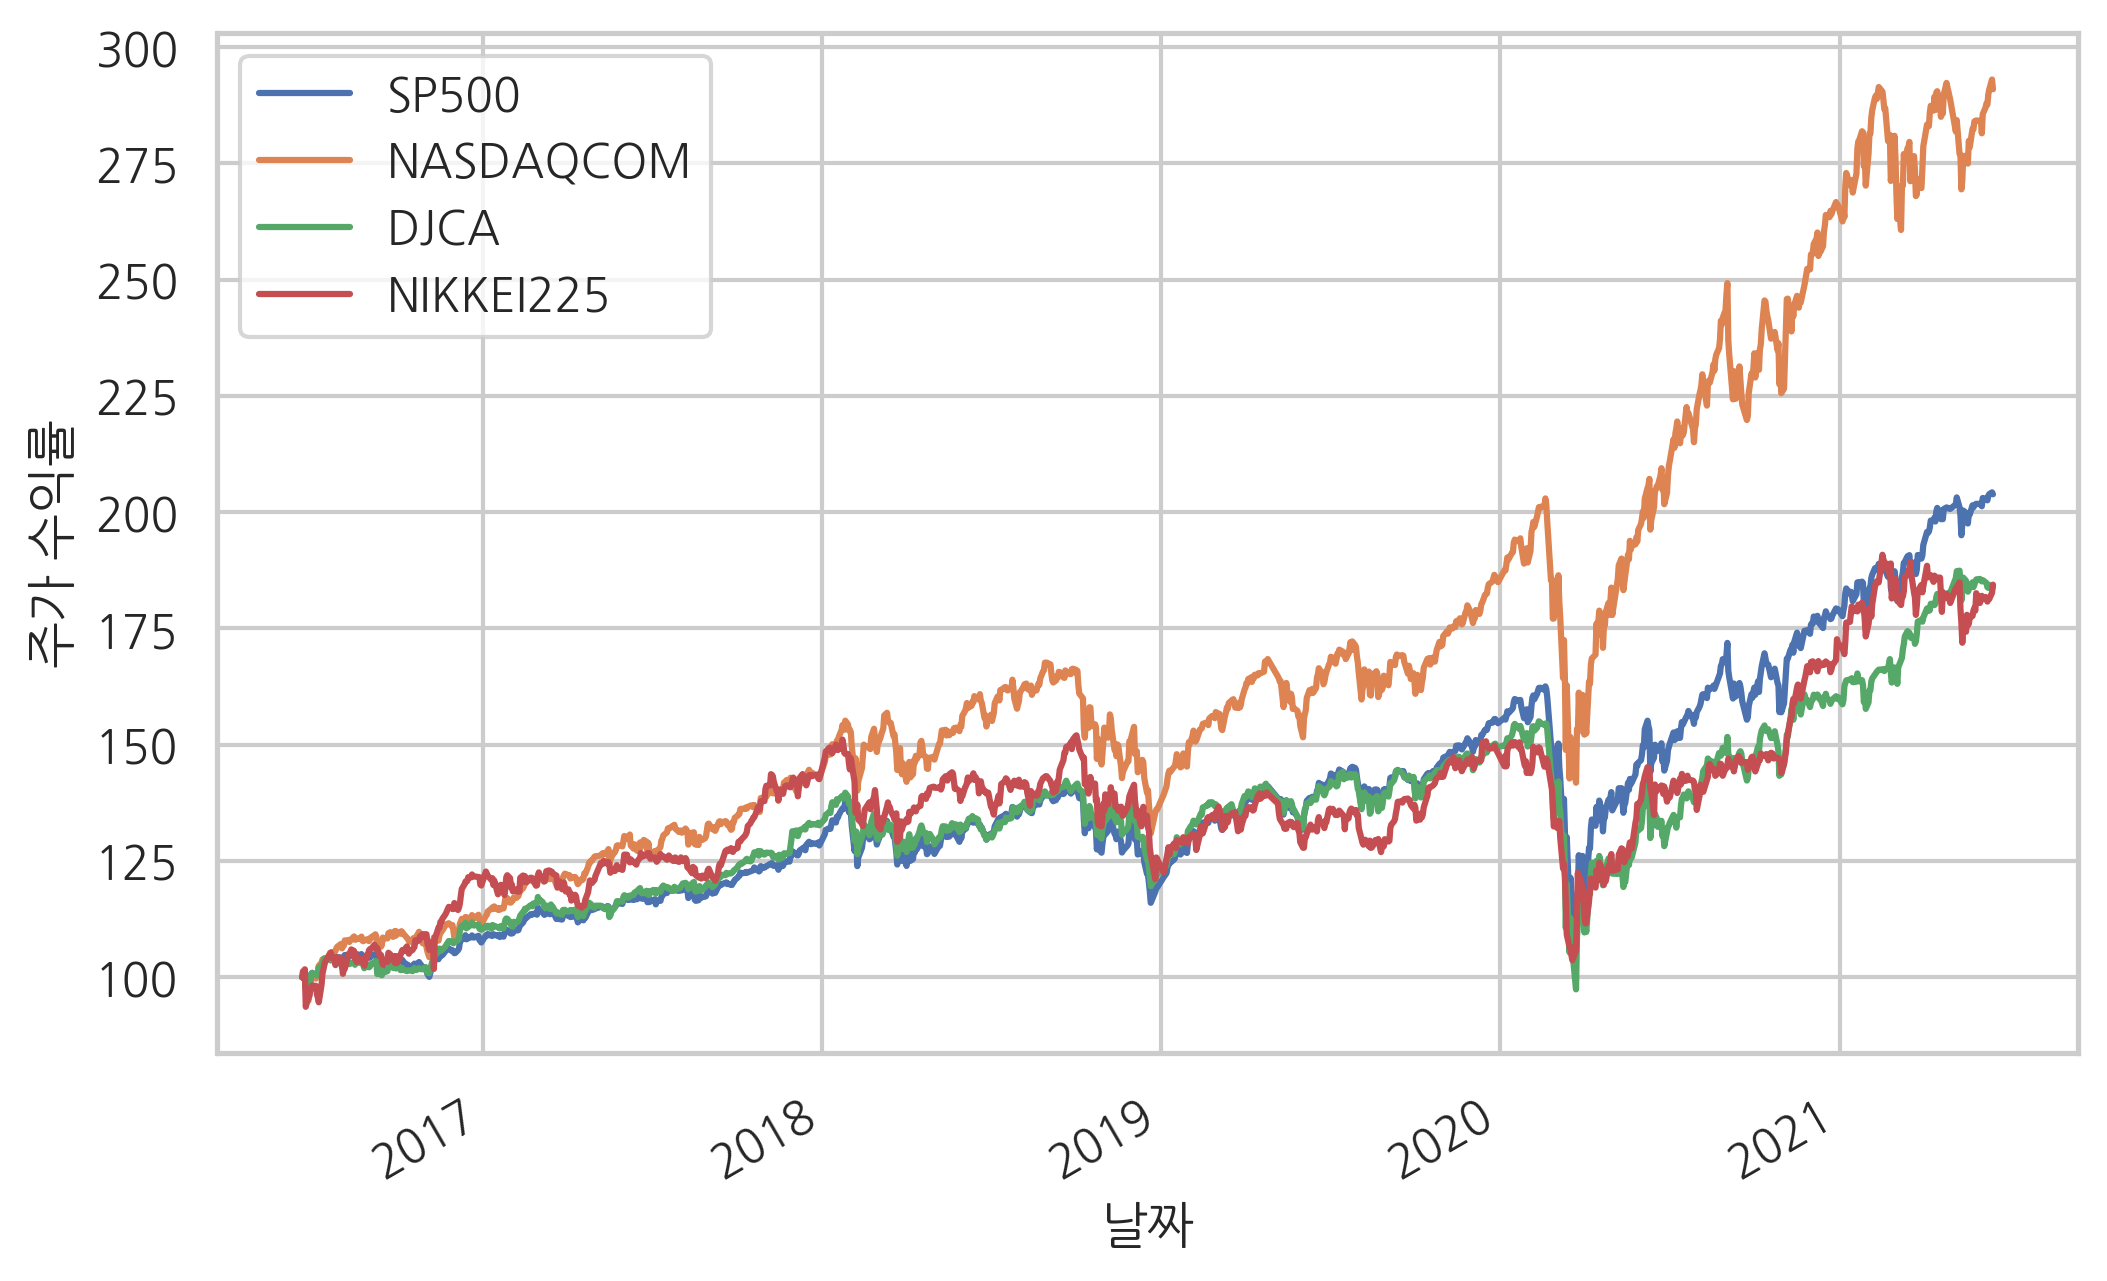

In [8]:
import pandas_datareader as web

symbols = ['SP500','NASDAQCOM','DJCA','NIKKEI225']
data = pd.DataFrame()
for sym in symbols : 
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data/data.iloc[0]*100).plot()

plt.xlabel('날짜')
plt.ylabel('주가 수익률')
plt.show()

# 각 지수 일간수익률 구해서 표본분포로 나타내보자.

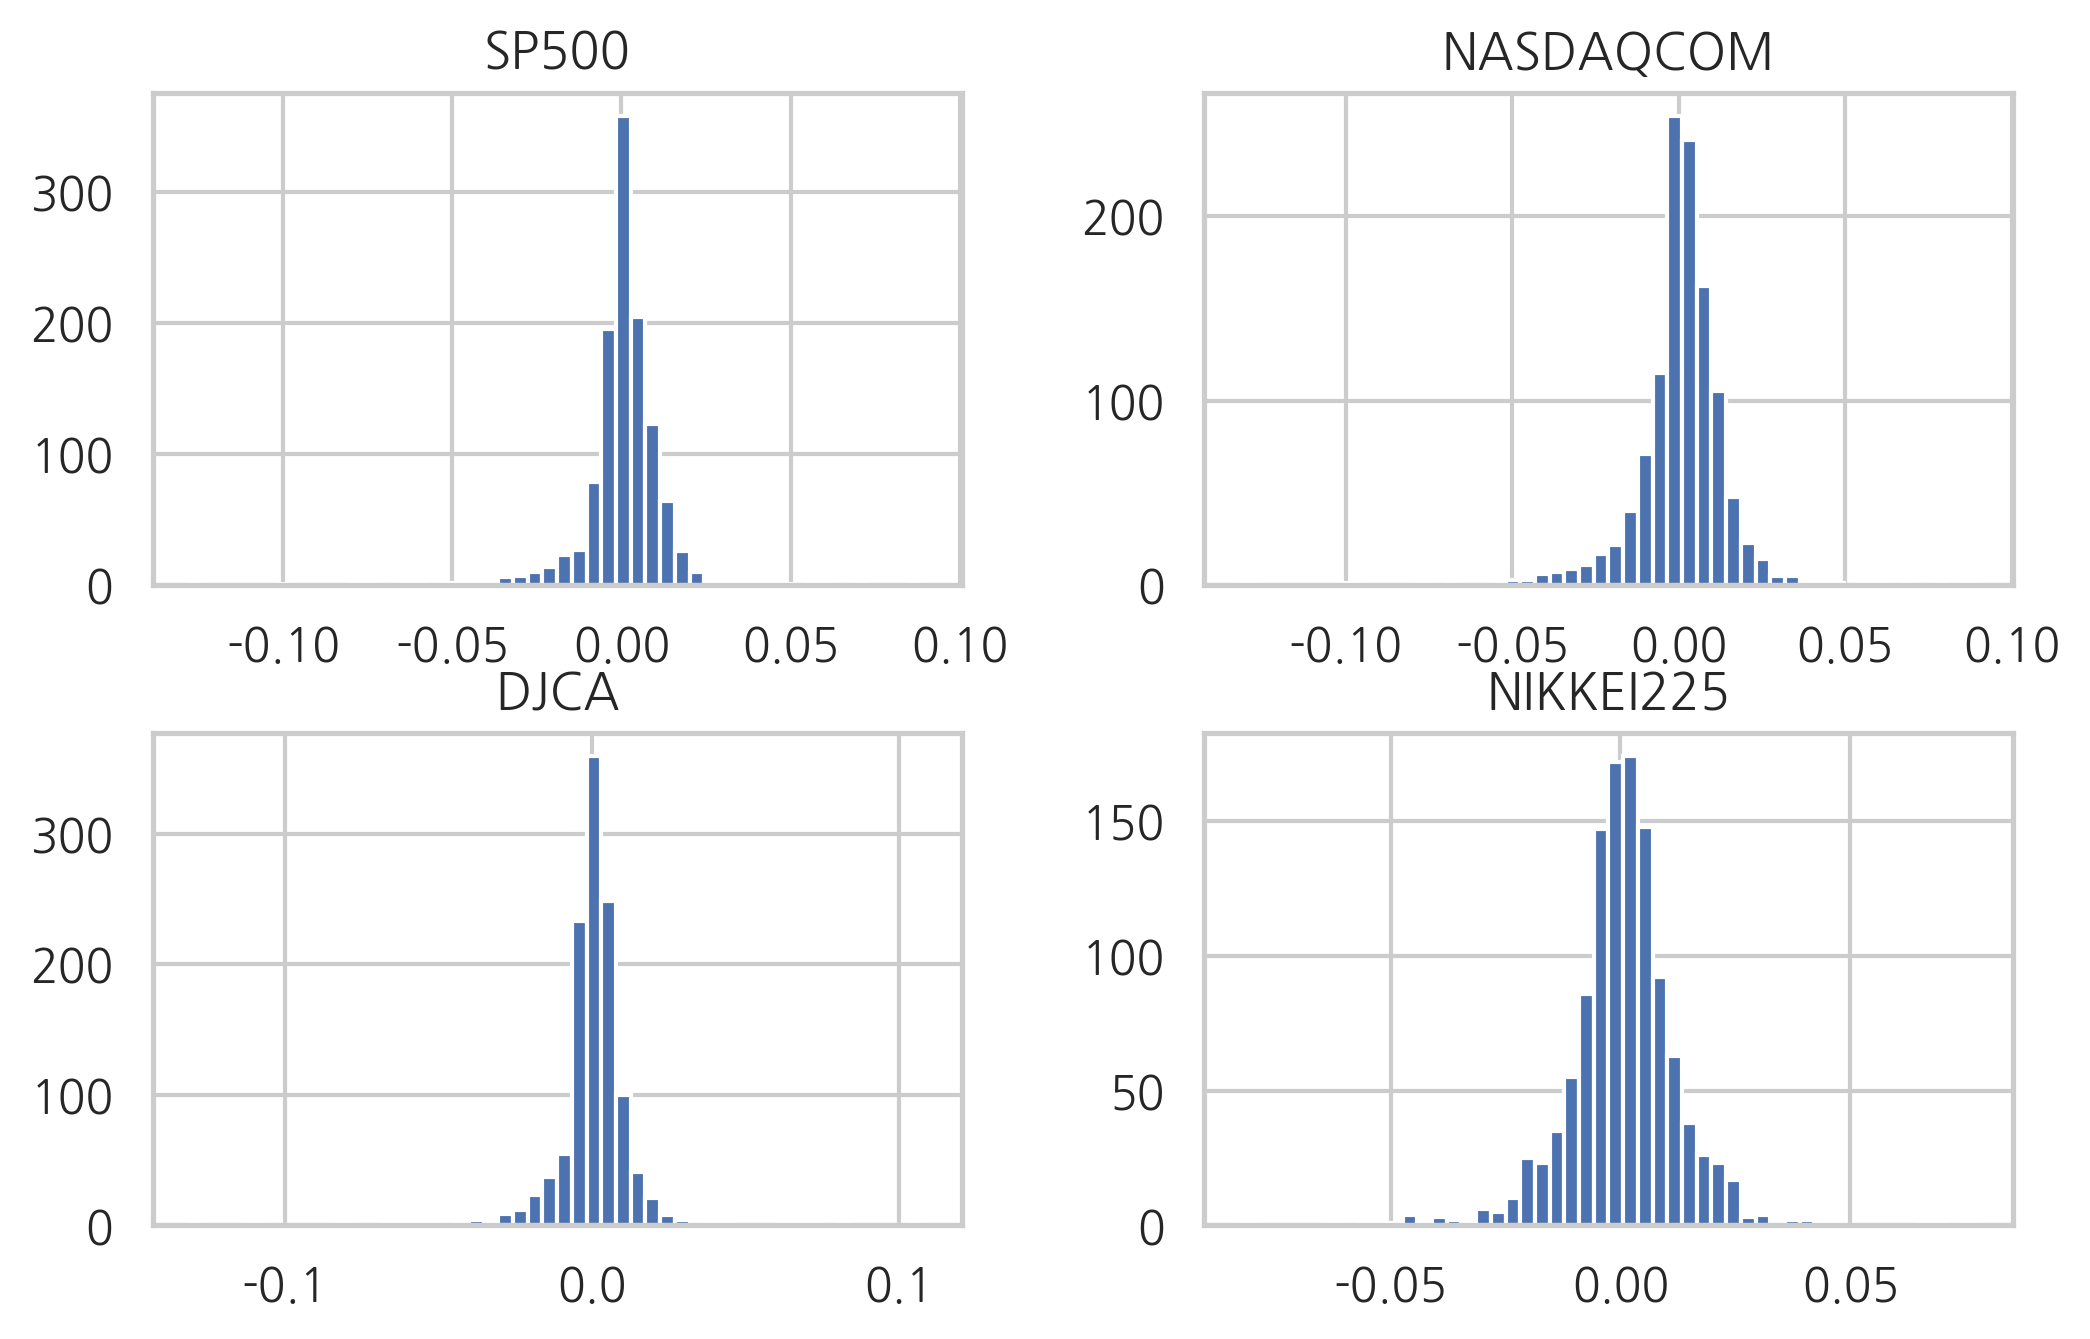

In [12]:
log_returns = np.log(data/data.shift(1))
log_returns.hist(bins=50)
plt.show()

# 표본분포들은 모두 정규분포와 닮아있다. 

# Q-Q 플롯으로 표본 데이터가 실제로 정규분포 따르는지 여부 검사해보자. 

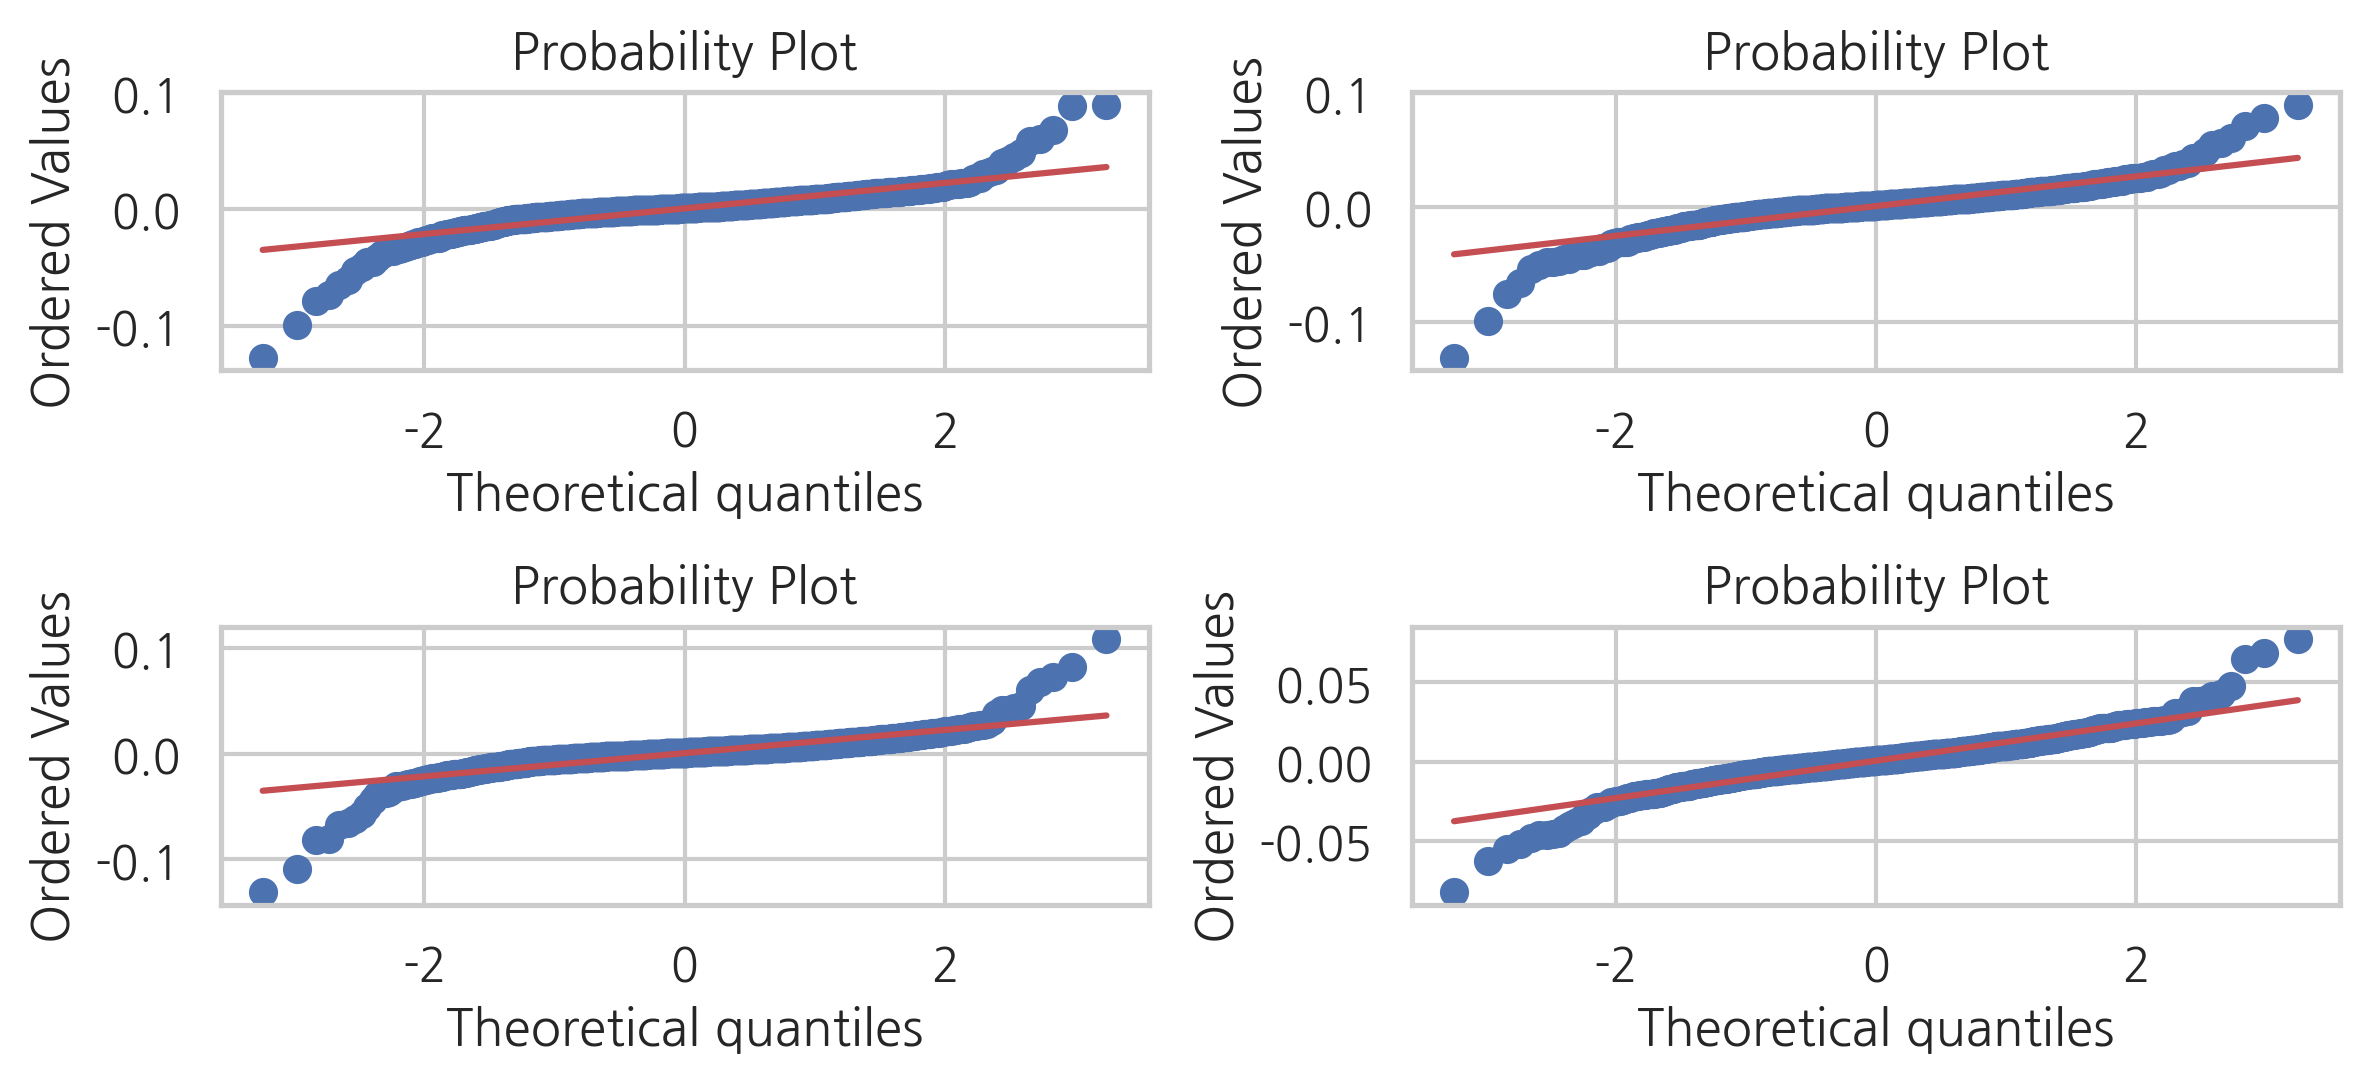

In [15]:
for i, sym in enumerate(symbols) : 
    ax = plt.subplot(3,2,i+1)
    sp.stats.probplot(log_returns[sym].dropna(),plot=ax)
plt.tight_layout()
plt.show()

# 양쪽 끝단에서 팻테일 현상 보인다. 

# t분포의 확률밀도함수를 자유도 변화시켜 가며 그려보자. 

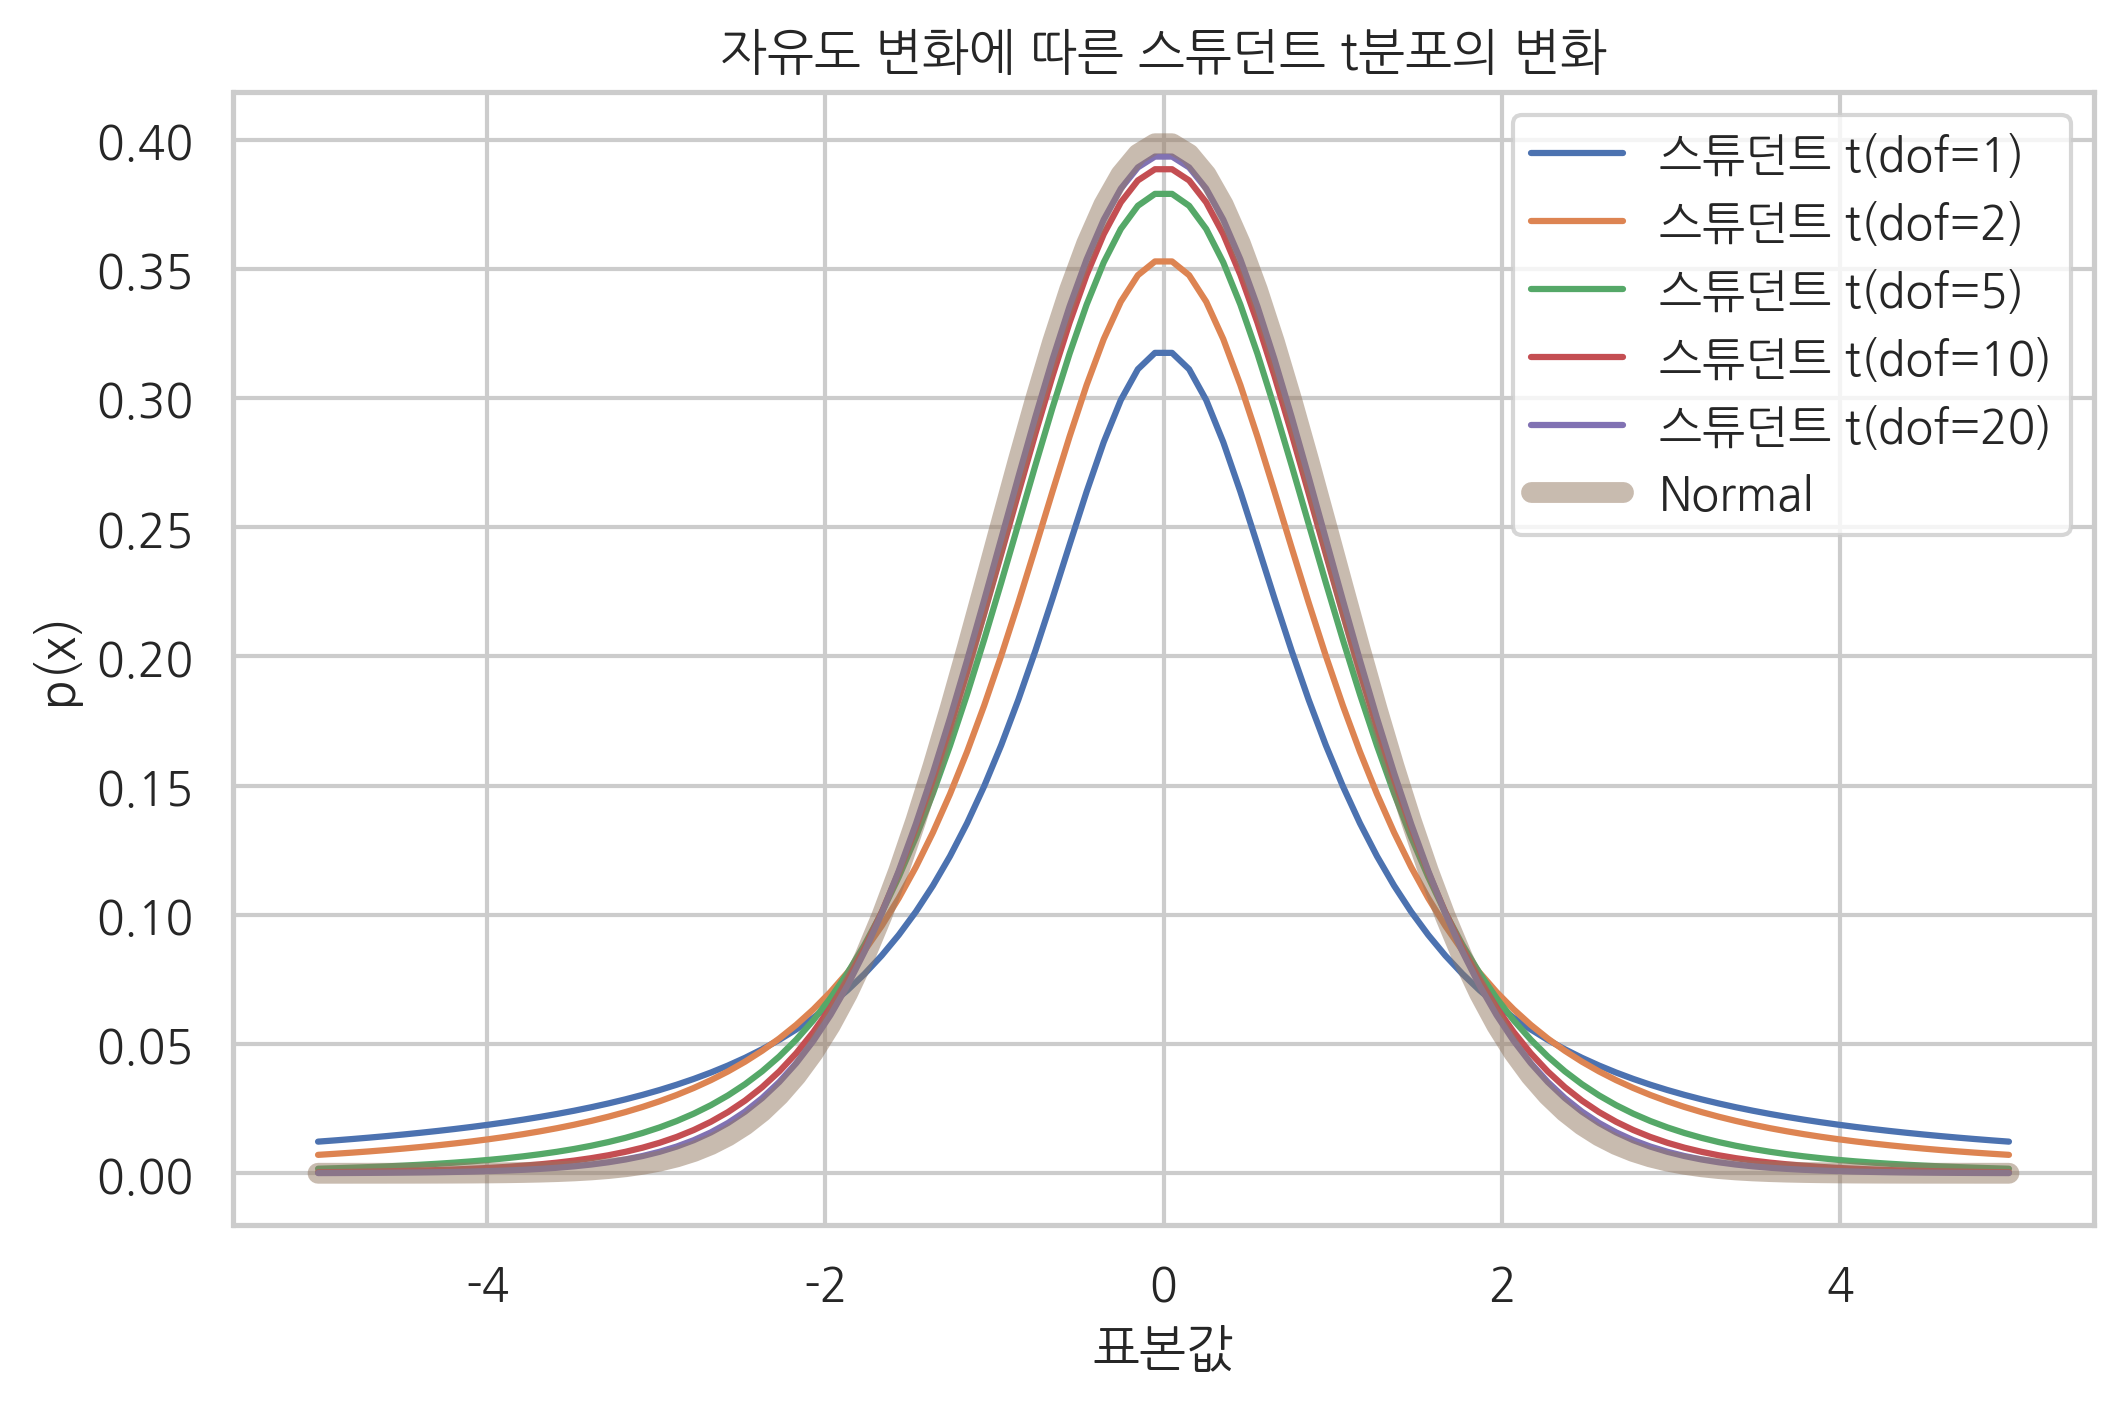

In [16]:
xx = np.linspace(-5,5,100)
for df in [1,2,5,10,20] : 
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx),label=('스튜던트 t(dof=%s)' %df))
plt.plot(xx, sp.stats.norm().pdf(xx), label='Normal', lw = 5, alpha=0.5)
plt.title('자유도 변화에 따른 스튜던트 t분포의 변화')
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.show()

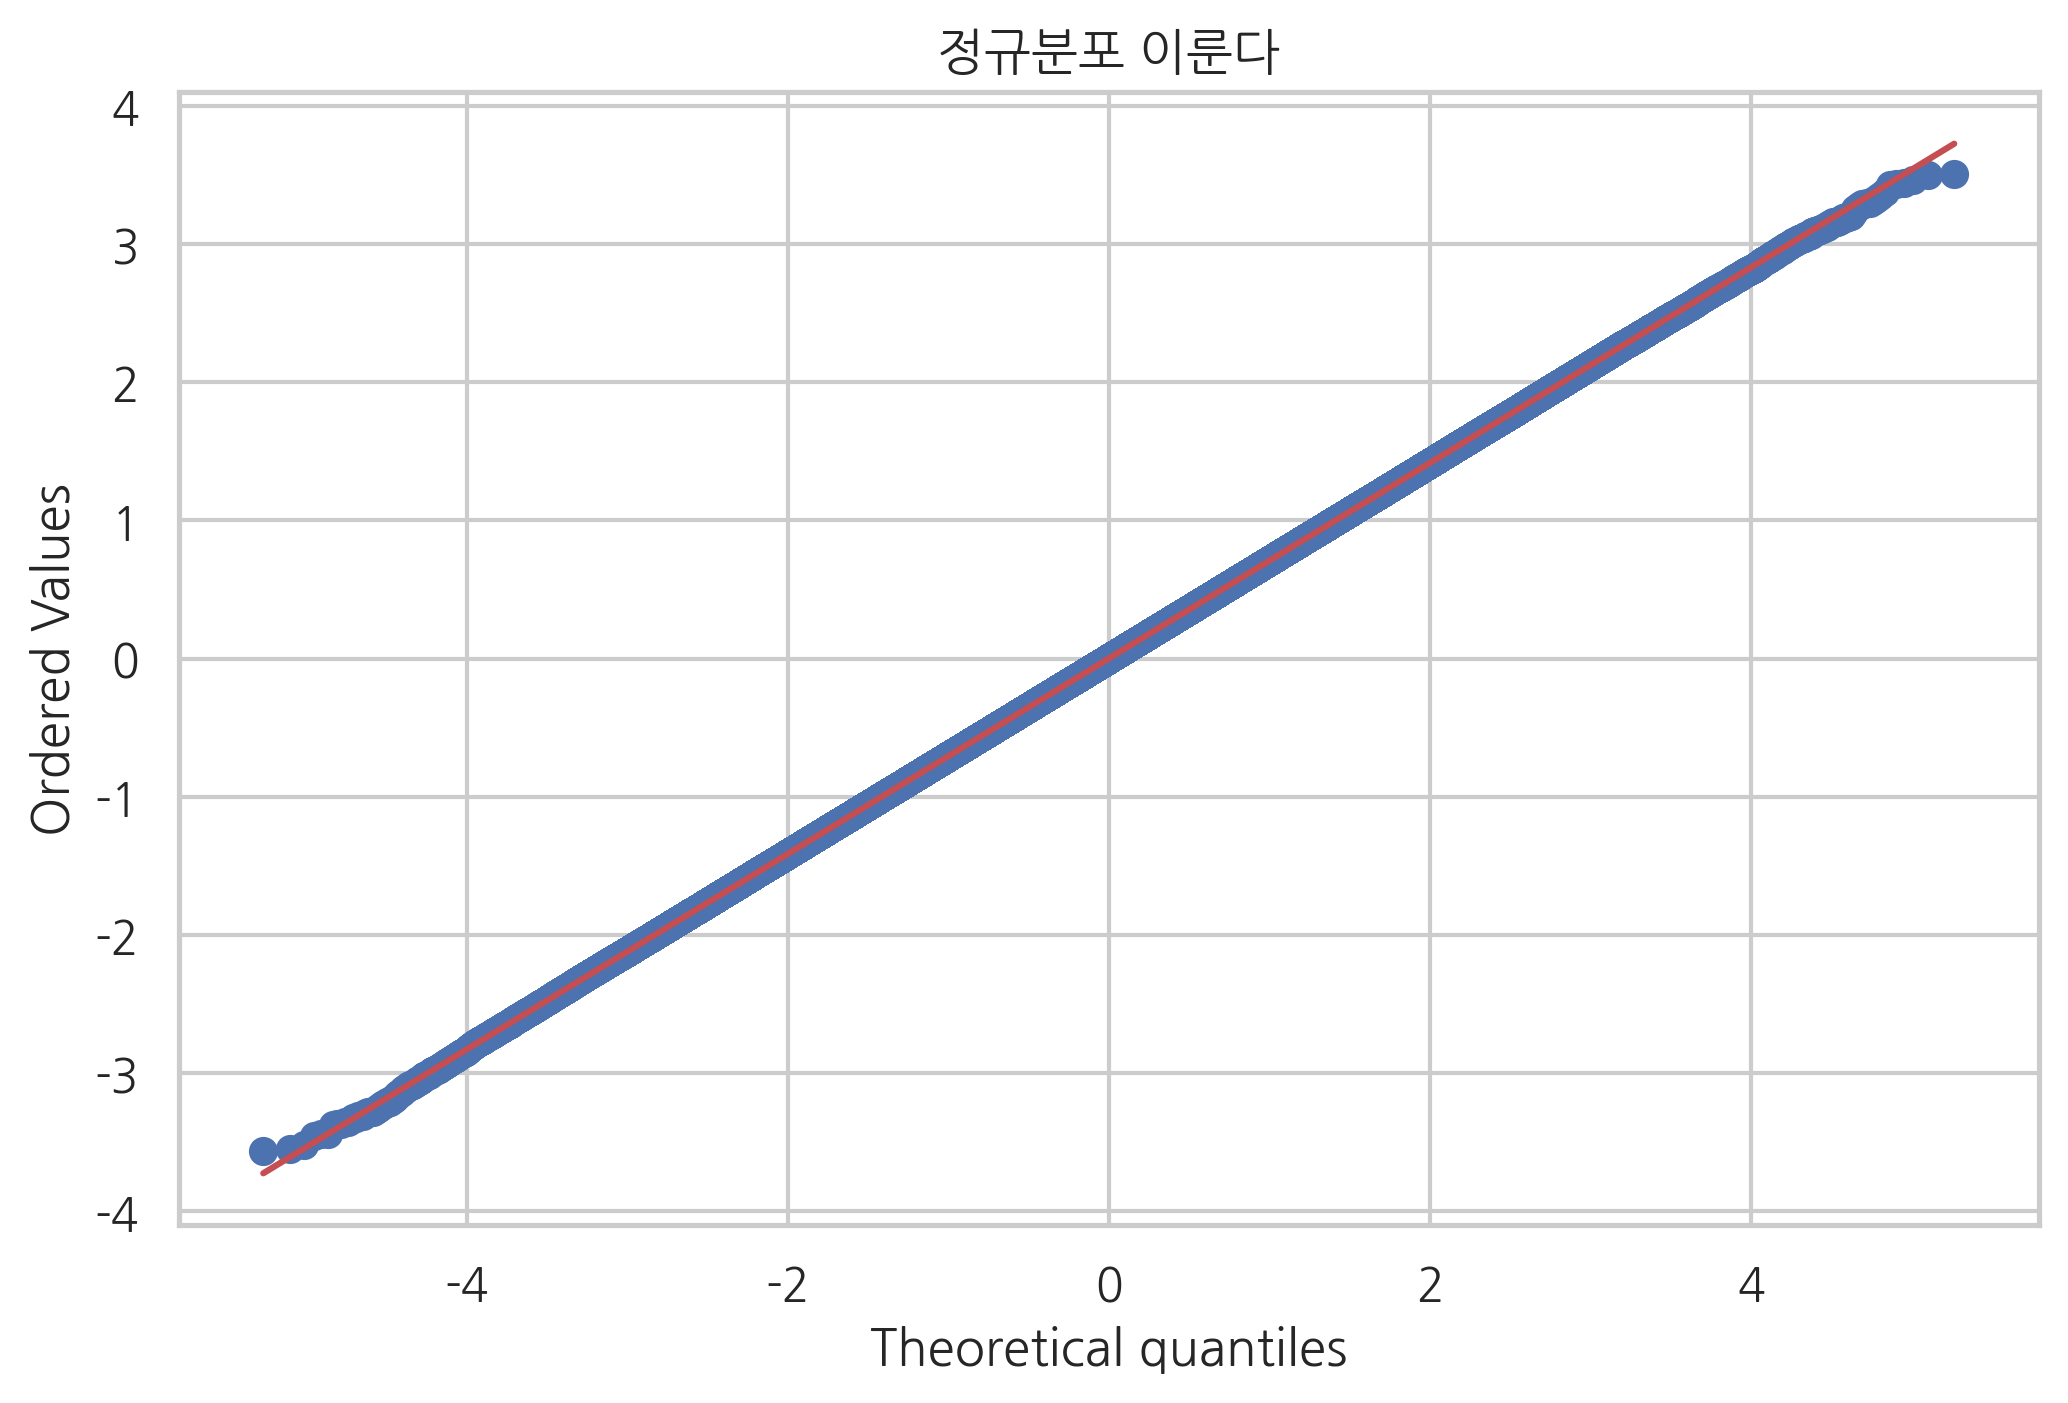

In [129]:
# test : 정규분포에서 얻은 표본들 평균은 정규분포 이룰까? 
np.random.seed(0)
X = np.random.normal(size=(1000000,2))
X_bar = X.sum(axis=1)/2 # 정규분포표본 평균값들

sp.stats.probplot(X_bar, plot=plt)
plt.title('정규분포 이룬다')
plt.show() 

In [131]:
print(0)
print(1/np.sqrt(2))

0
0.7071067811865475


In [132]:
print(np.mean(X_bar))
print(np.std(X_bar))

0.00031720783808251177
0.7070782005859463


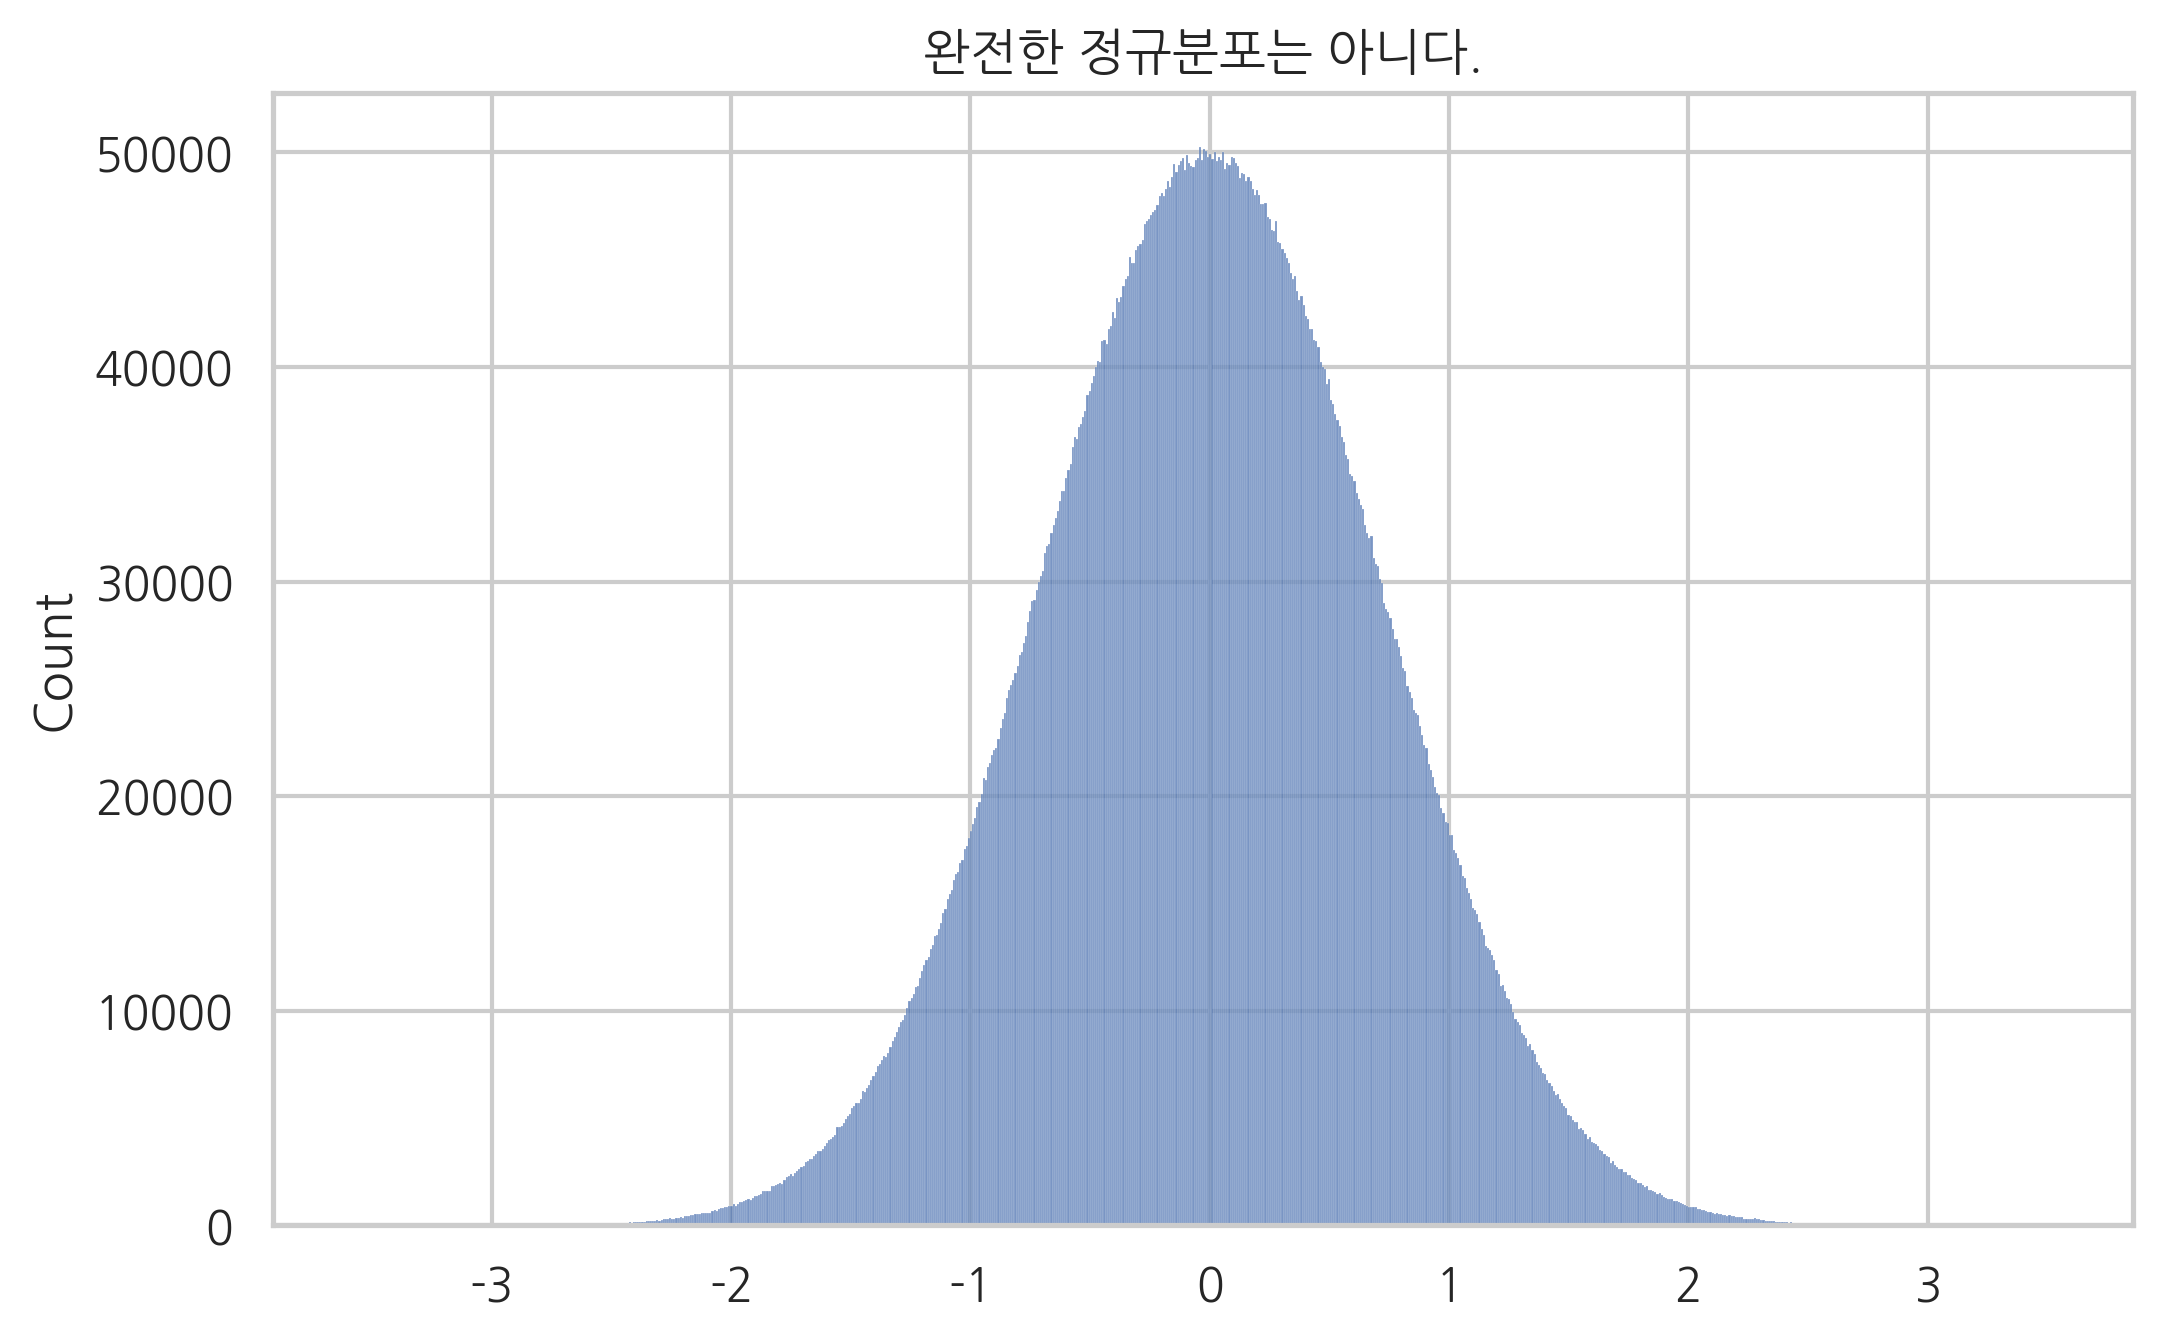

In [133]:
sns.histplot(X_bar)
plt.title('완전한 정규분포는 아니다.')
plt.show()

0
1
0.000448599626707337
0.999959580927009


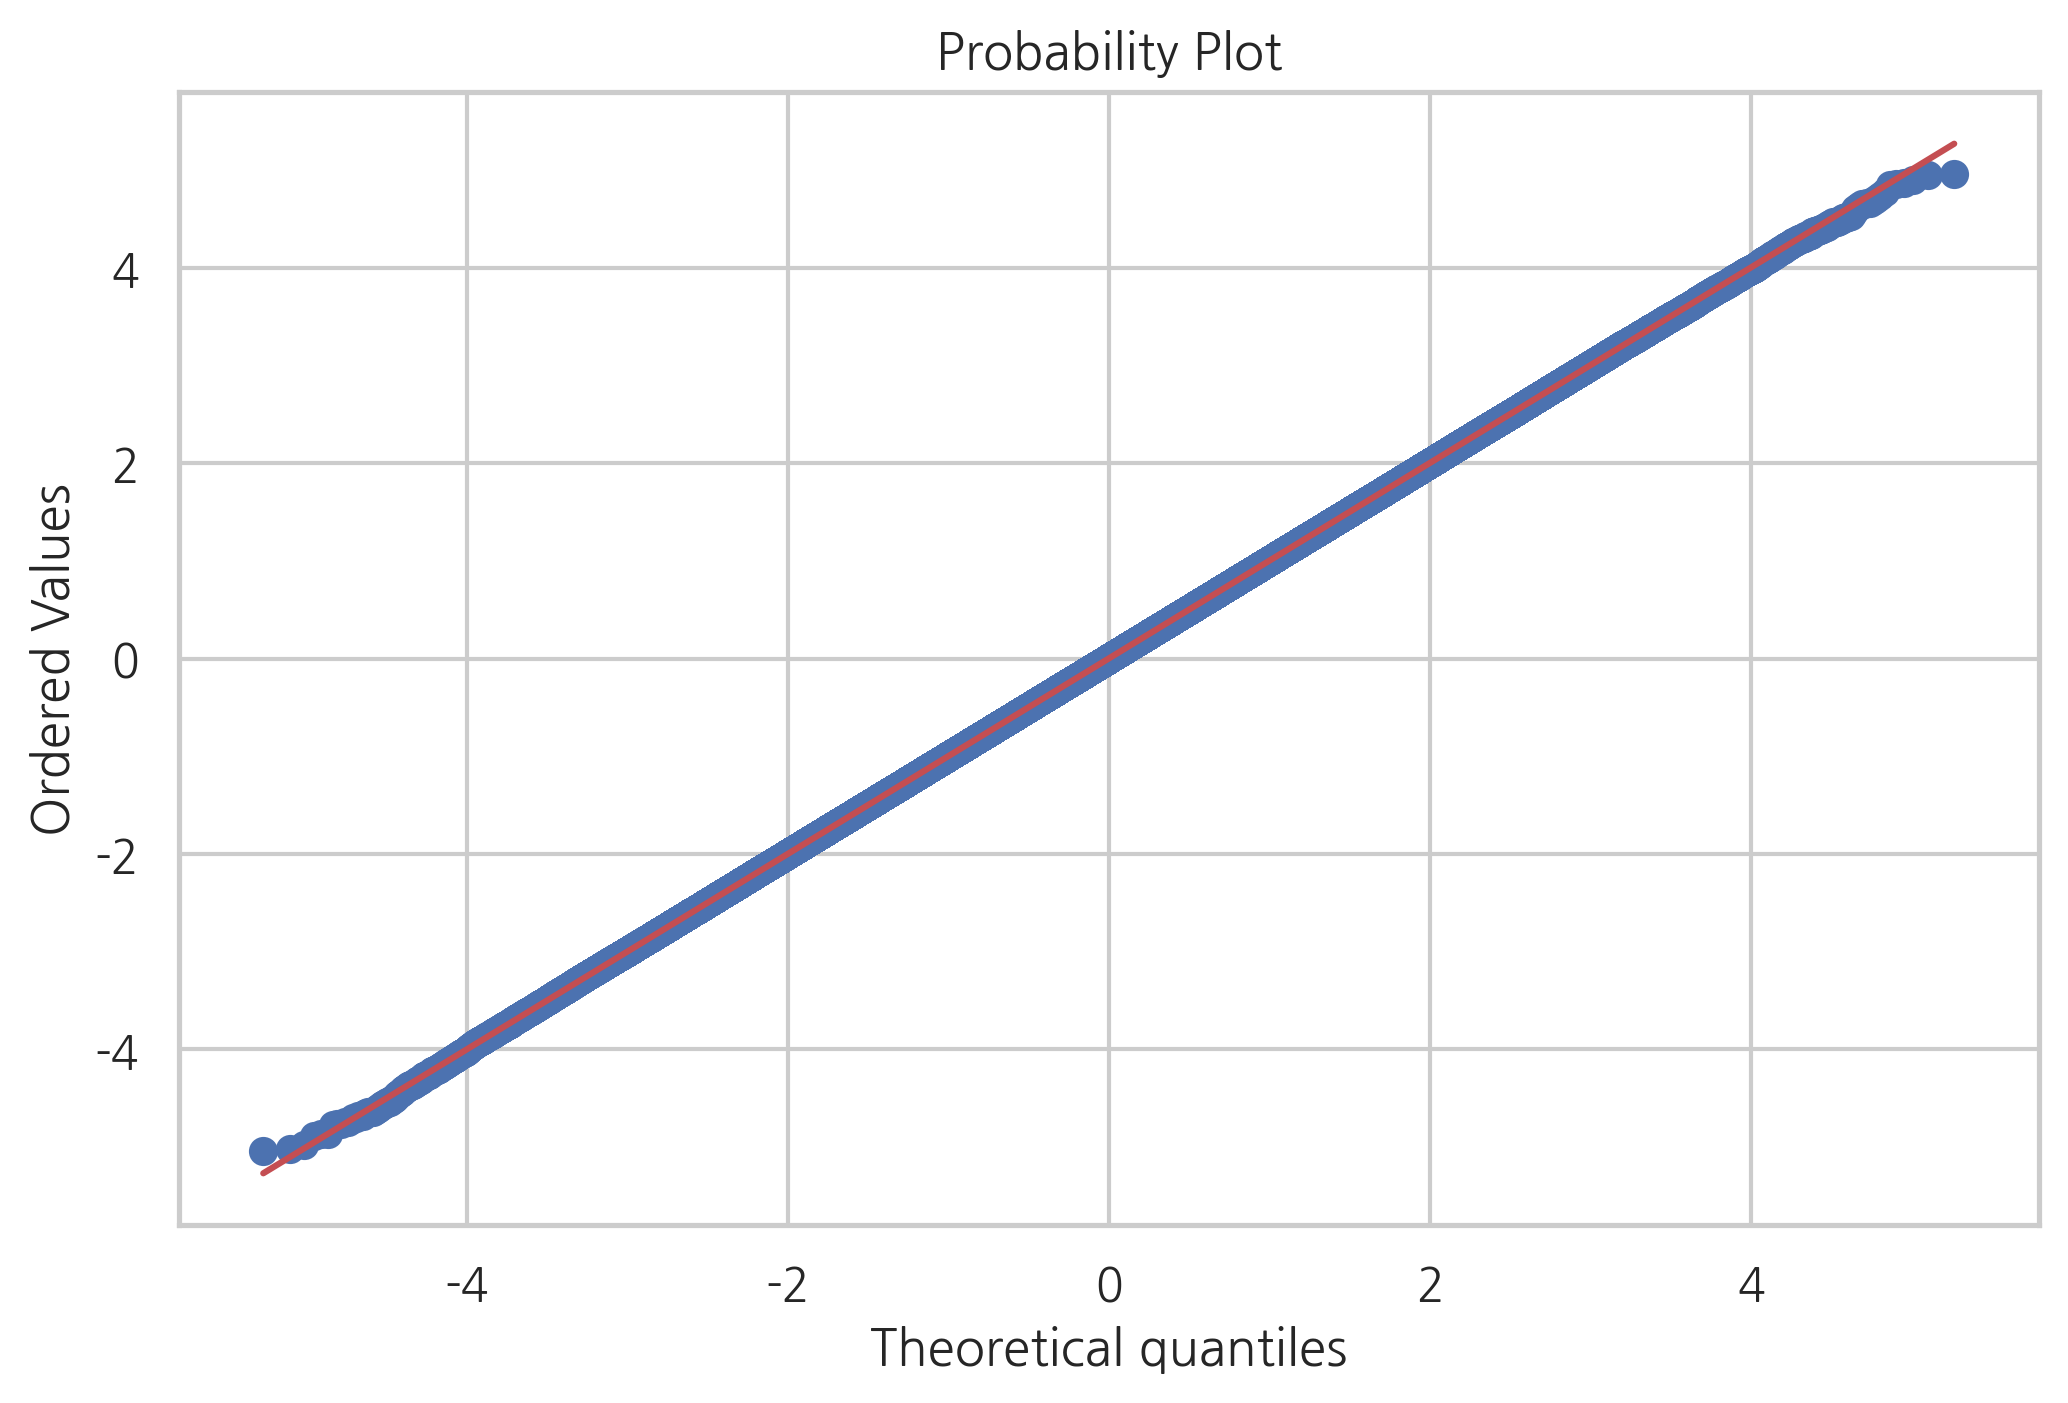

In [134]:
Z = (X_bar)/(1/np.sqrt(2))
print(0)
print(1)

print(np.mean(Z))
print(np.std(Z))

sp.stats.probplot(Z,plot=plt)
plt.show()

<AxesSubplot:ylabel='Count'>

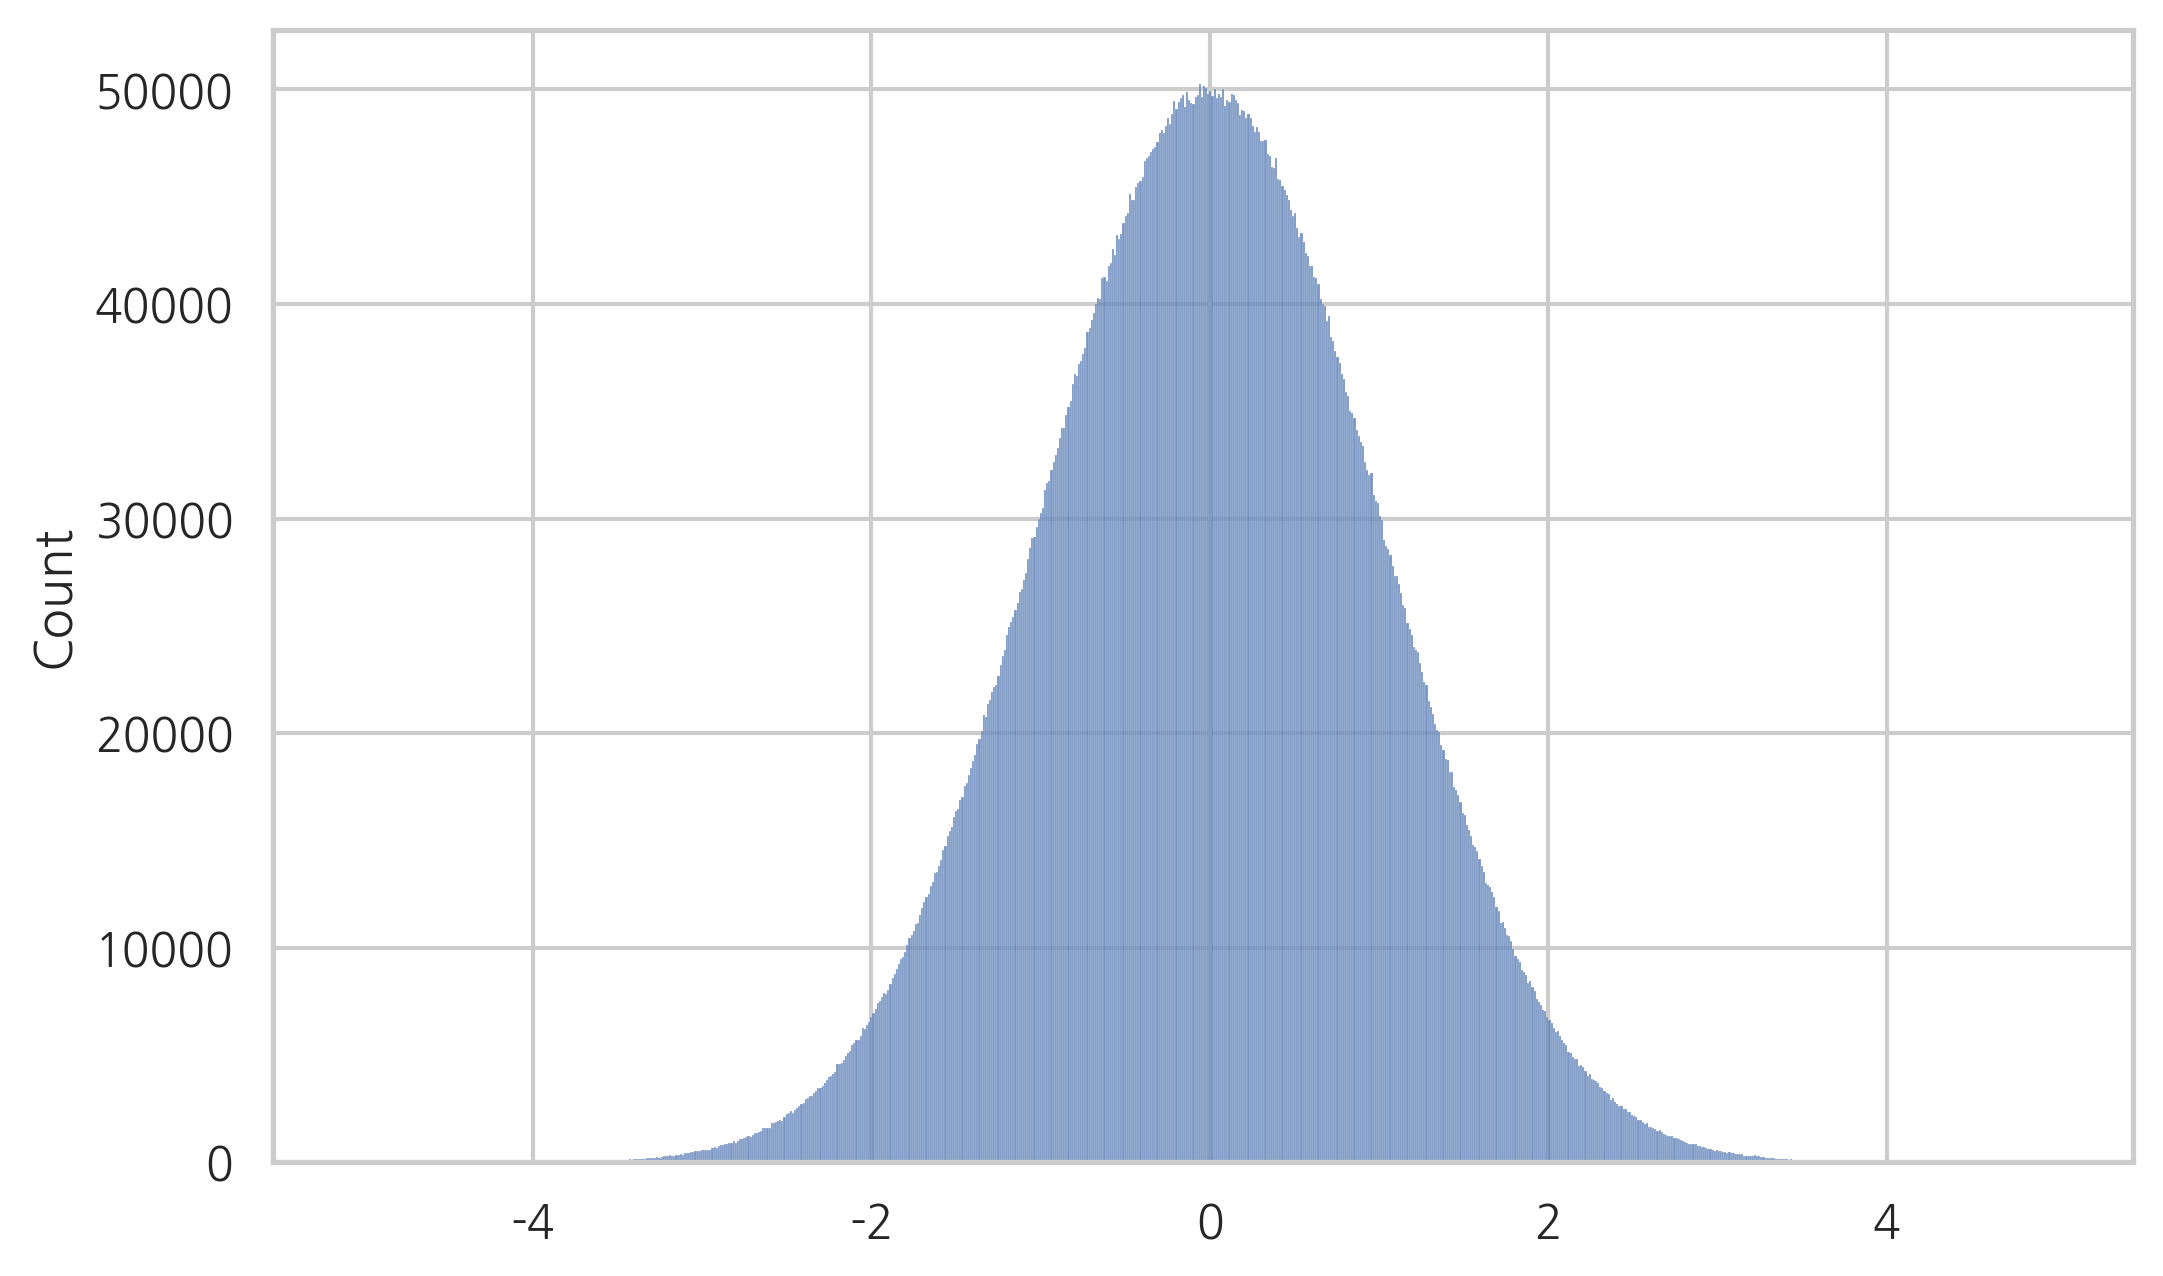

In [135]:
sns.histplot(Z)

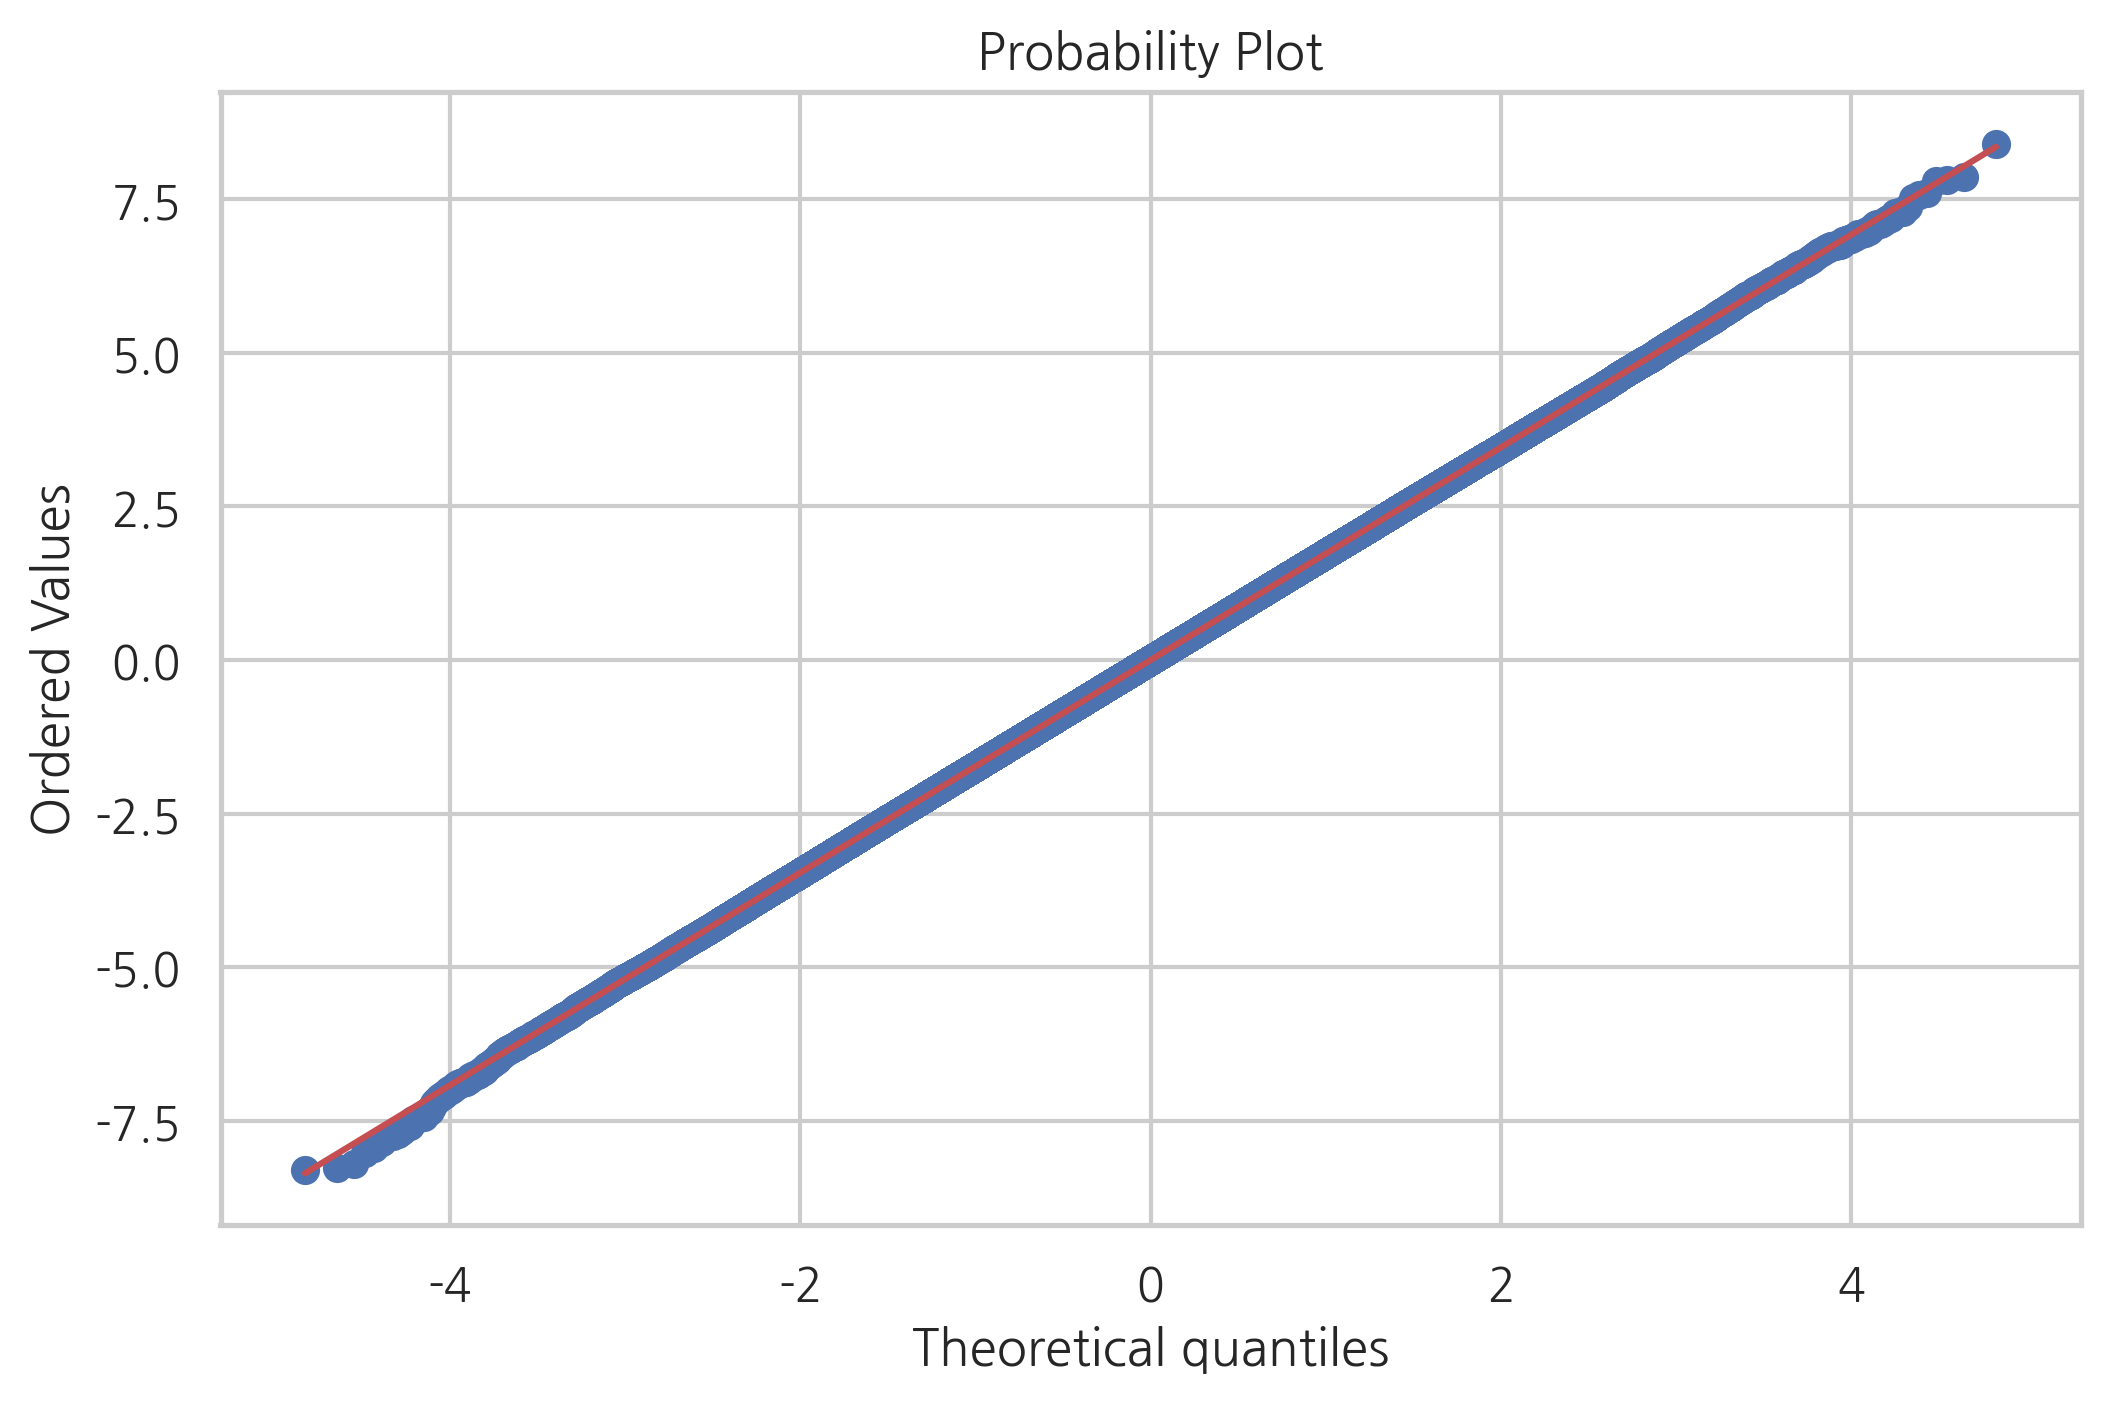

In [148]:
#test2 
np.random.seed(1)
X2 = np.random.normal(size=(1000000,3))
data = X2.sum(axis=1)
sp.stats.probplot(data, plot=plt)
plt.show()

In [149]:
print(0)
print(3)

print(np.mean(data))
print(np.var(data))

0
3
-0.0004048112639022514
2.99460219750185


# 표본 시뮬레이션 이용해서 t분포 나타내기 

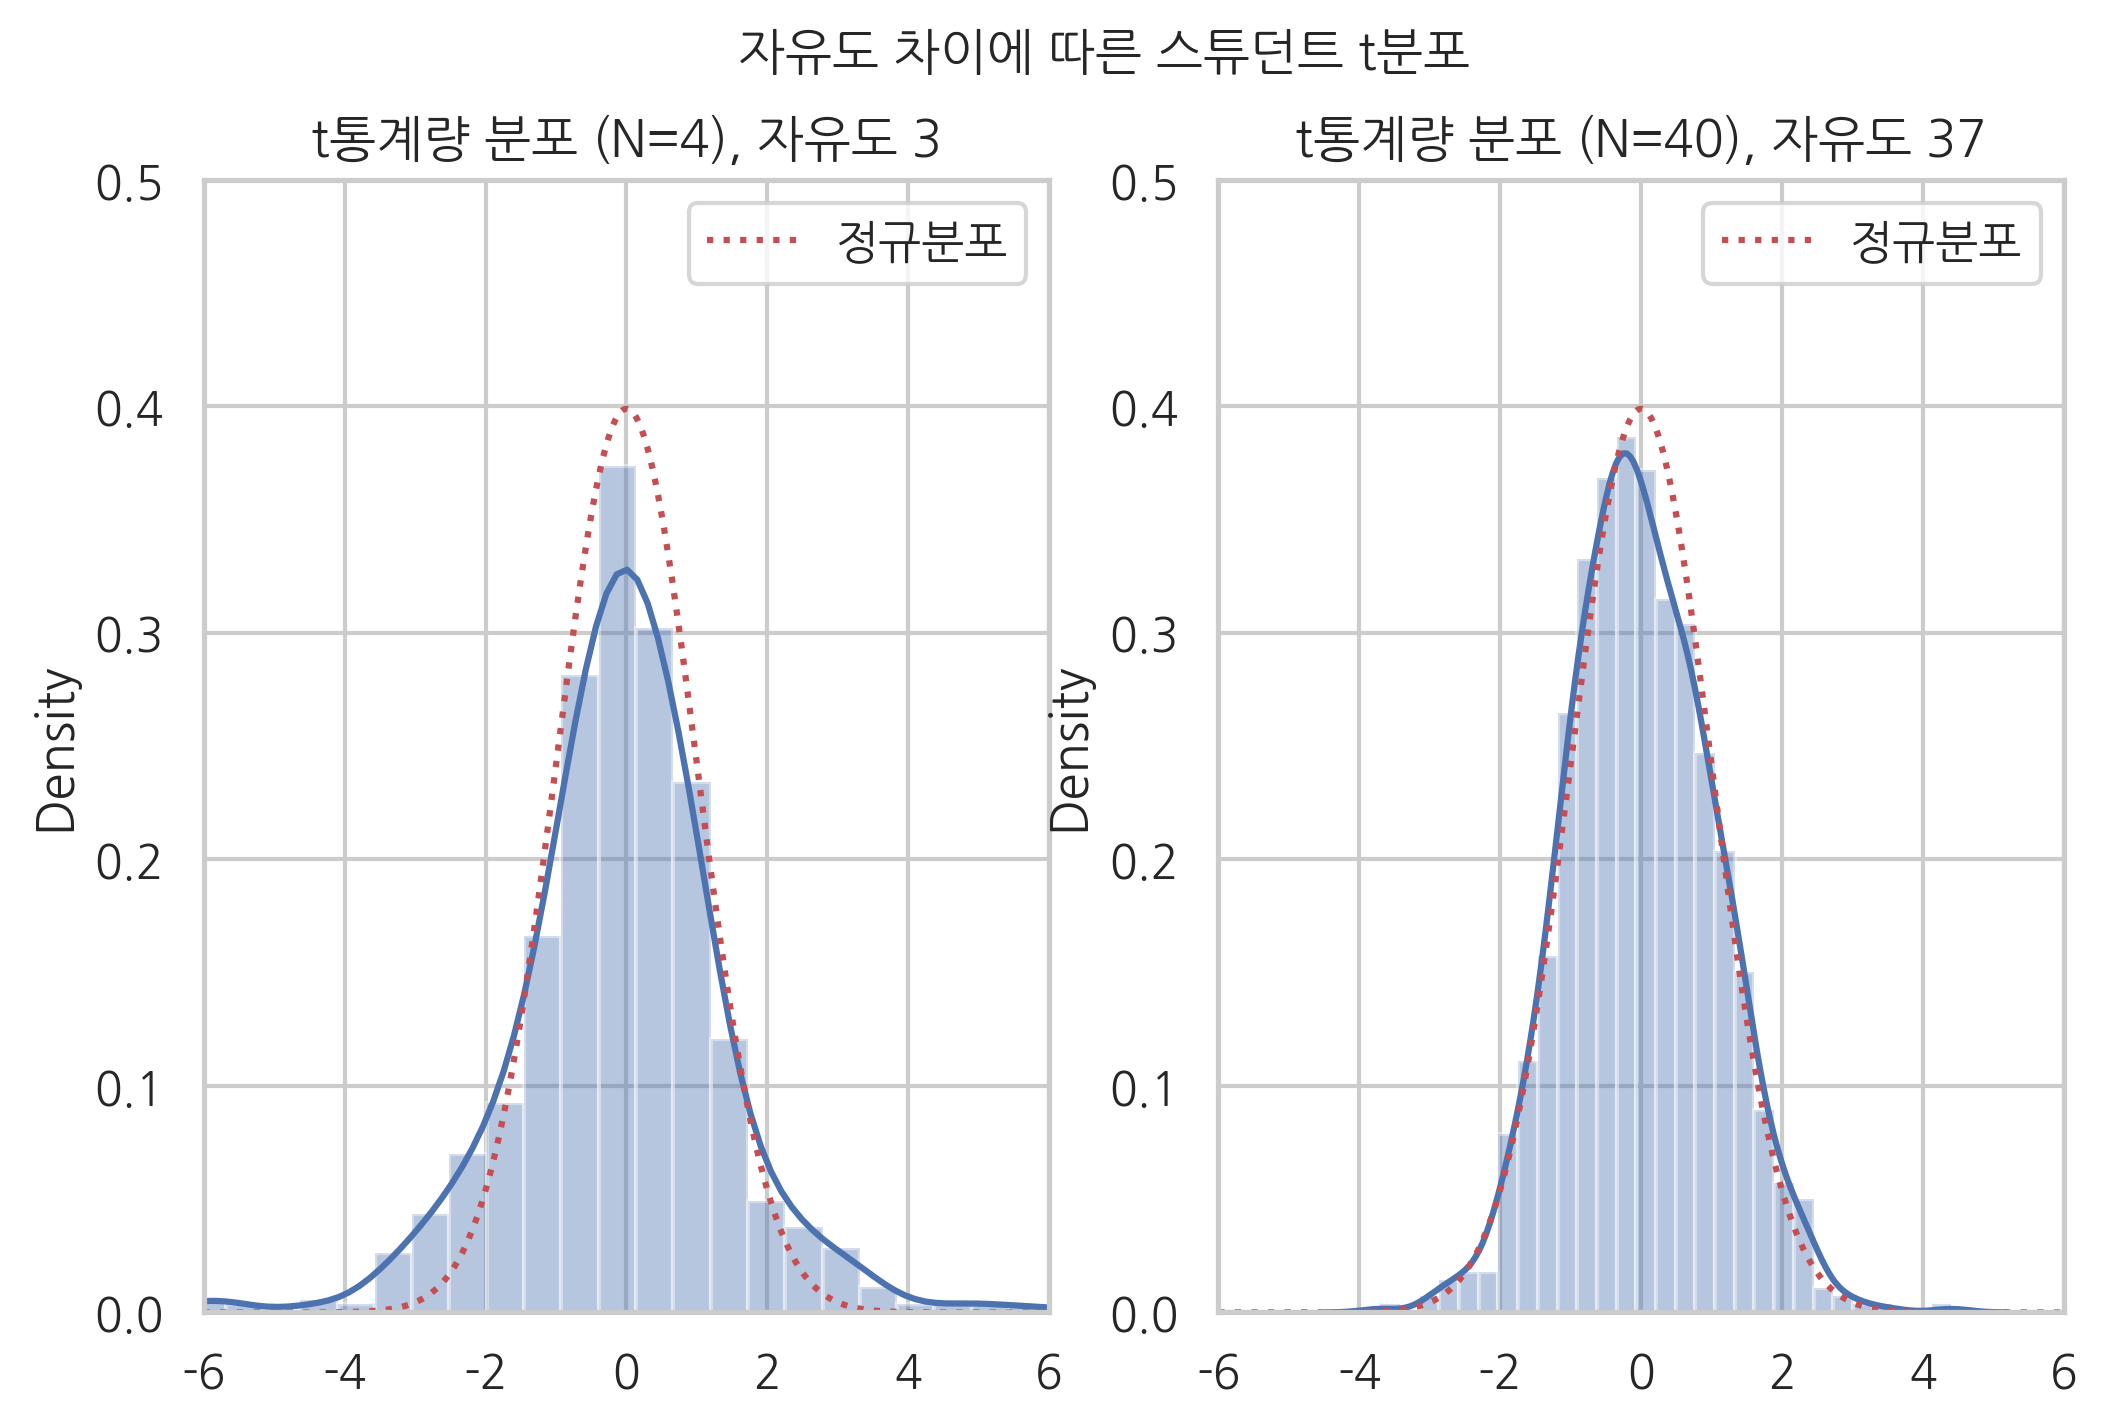

In [182]:
np.random.seed(0)

rv = sp.stats.norm()
M=1000

plt.subplot(1,2,1)
N=4
x1 = rv.rvs((M,N))
xbar1 = x1.mean(axis=1) # 표본평균
xstd1 = x1.std(axis=1, ddof=1) #표본표준편차 s
t = xbar1/(xstd1/np.sqrt(N)) #t통계량
sns.distplot(t, kde=True)

xx = np.linspace(-6,6,1000)
plt.plot(xx, rv.pdf(xx),'r:',label='정규분포')
plt.xlim(-6,6)
plt.ylim(0,0.5)
plt.title('t통계량 분포 (N=4), 자유도 3')
plt.legend()

plt.subplot(1,2,2)
N=40
x2 = rv.rvs((M,N))
xbar2 = x2.mean(axis=1)
xstd2 = x2.std(axis=1, ddof=1)
t=xbar2/(xstd2/np.sqrt(N))
sns.distplot(t, kde=True)
xx = np.linspace(-6,6,1000)
plt.plot(xx, rv.pdf(xx), 'r:',label='정규분포')
plt.xlim(-6,6)
plt.ylim(0,0.5)
plt.title('t통계량 분포 (N=40), 자유도 37')
plt.legend()

plt.suptitle('자유도 차이에 따른 스튜던트 t분포')
plt.show()

# 자유도가 클 수록 팻테일 현상, 분산이 줄어들고 정규분포에 수렴한다. 
# 오른쪽

# 카이제곱 분포
- 카이제곱분포의 확률밀도함수 모양 
- chi2()

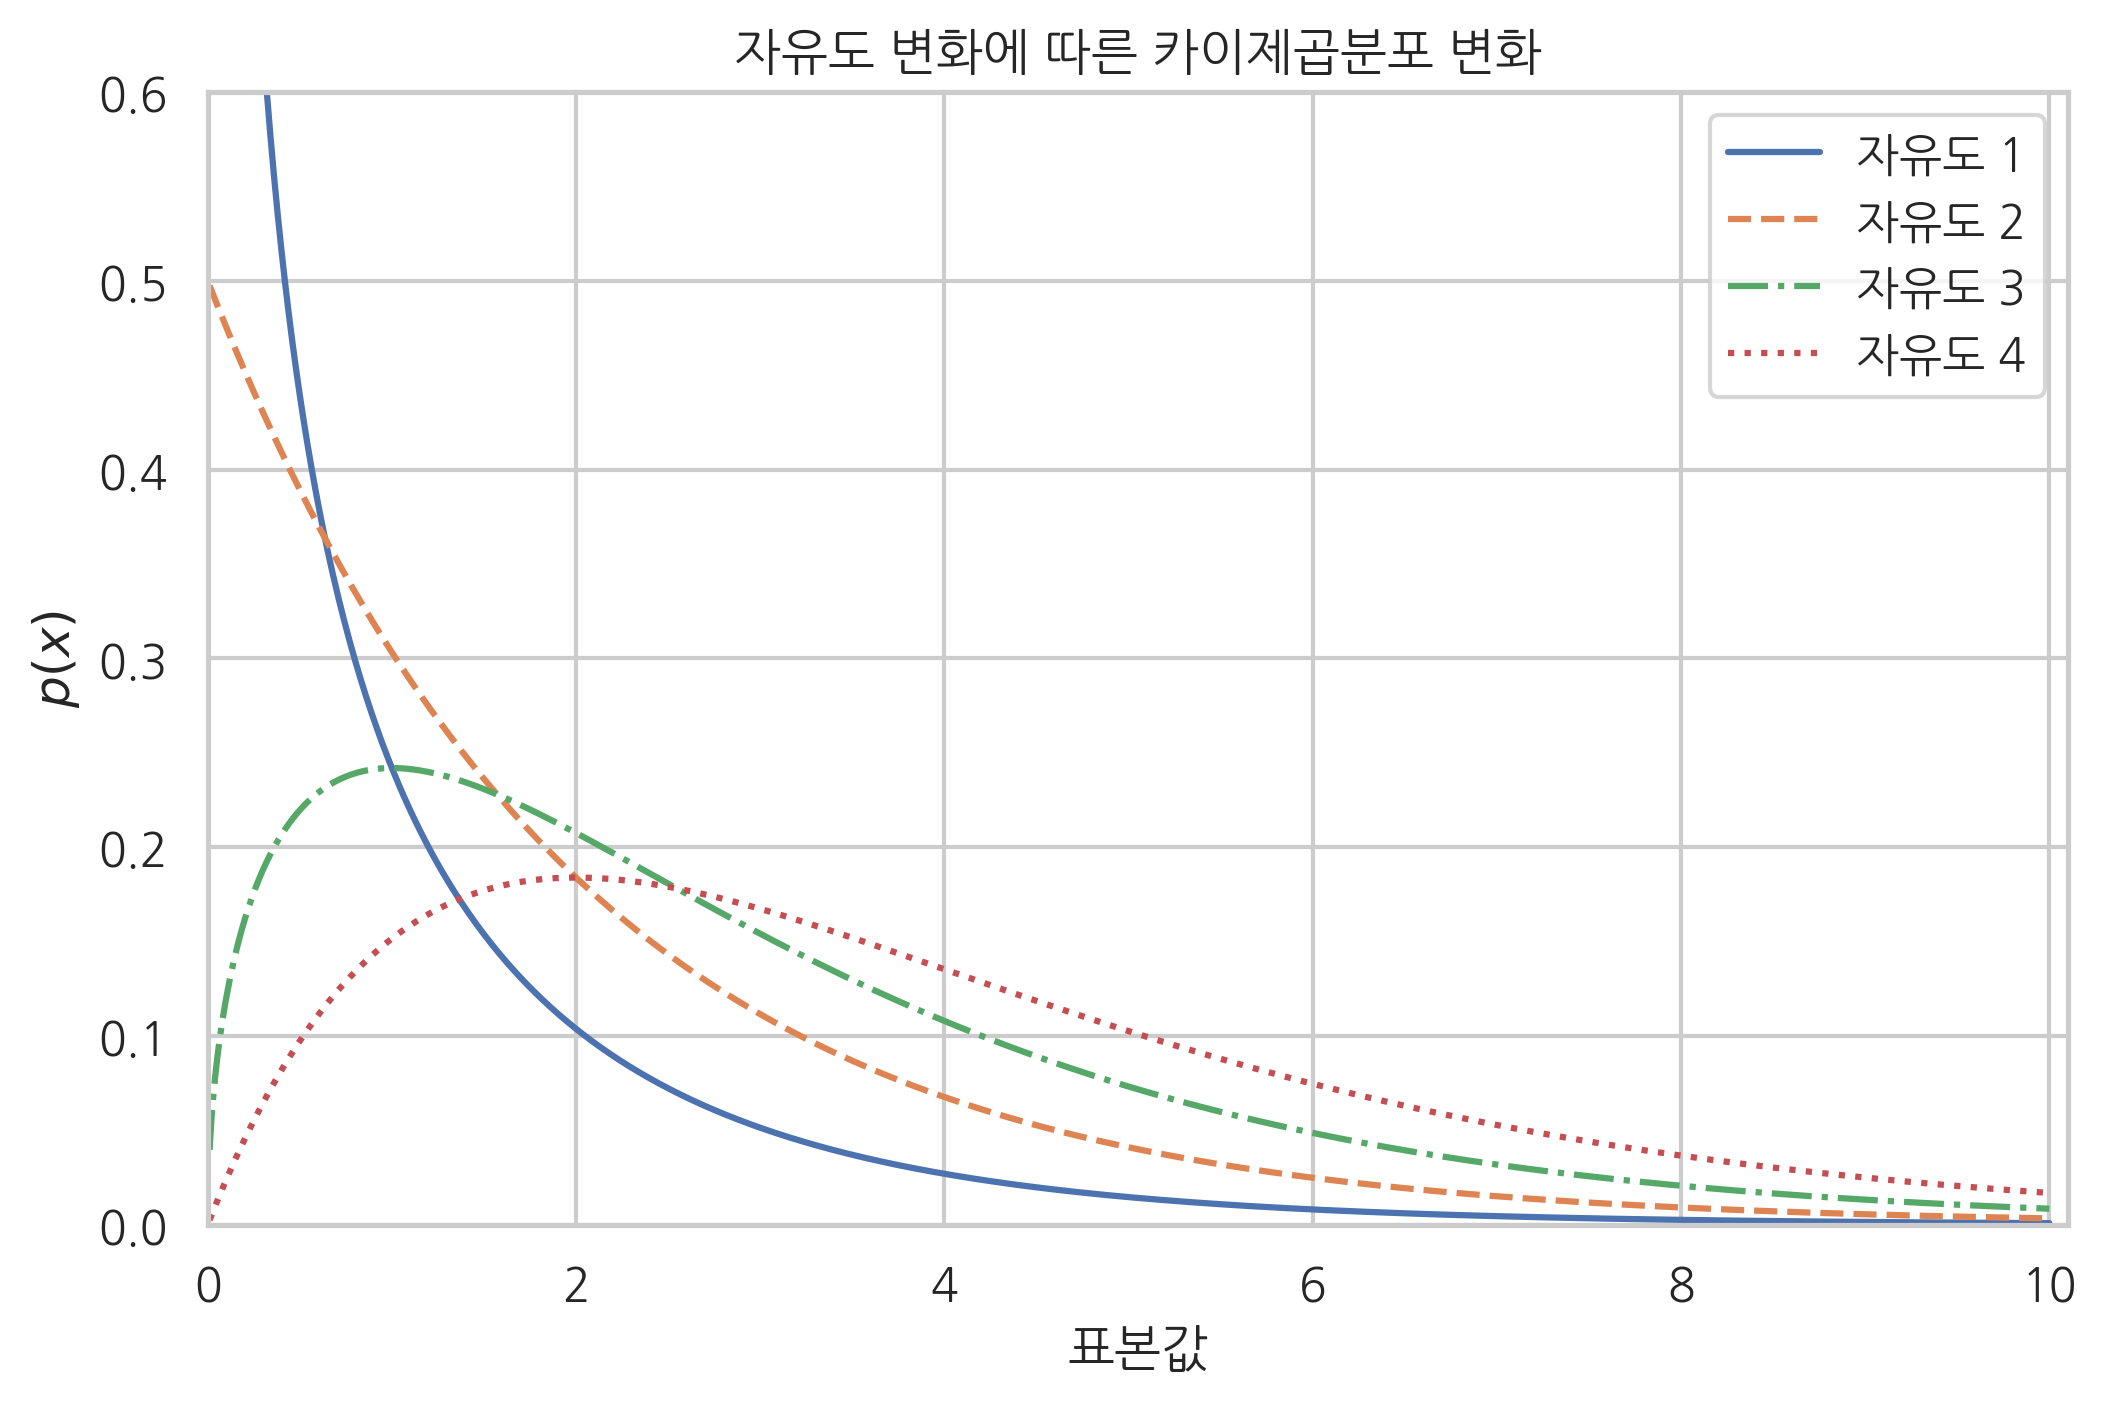

In [187]:
xx = np.linspace(0.01,10,1000)
dfs = np.arange(1,5)
lss = ['-','--','-.',':']
for df,ls in zip(dfs, lss) : 
    rv = sp.stats.chi2(df = df) #자유도값 지정한 카이제곱 분포객체
    plt.plot(xx, rv.pdf(xx), ls=ls, label=('자유도 %s' %df))
plt.xlim(0,10.1)
plt.ylim(0,0.6)
plt.title('자유도 변화에 따른 카이제곱분포 변화')
plt.xlabel('표본값')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

# 카이제곱분포 (정규분포 표본제곱합 분포)
### - 자유도(표본갯수N)이 2보다 커지면 0이 아닌 0보다 큰 어떤 특정값이 가장 자주 발생한다.
### - 자유도가 2이하 일 때는 0근처 값이 가장 자주 발생한다. 

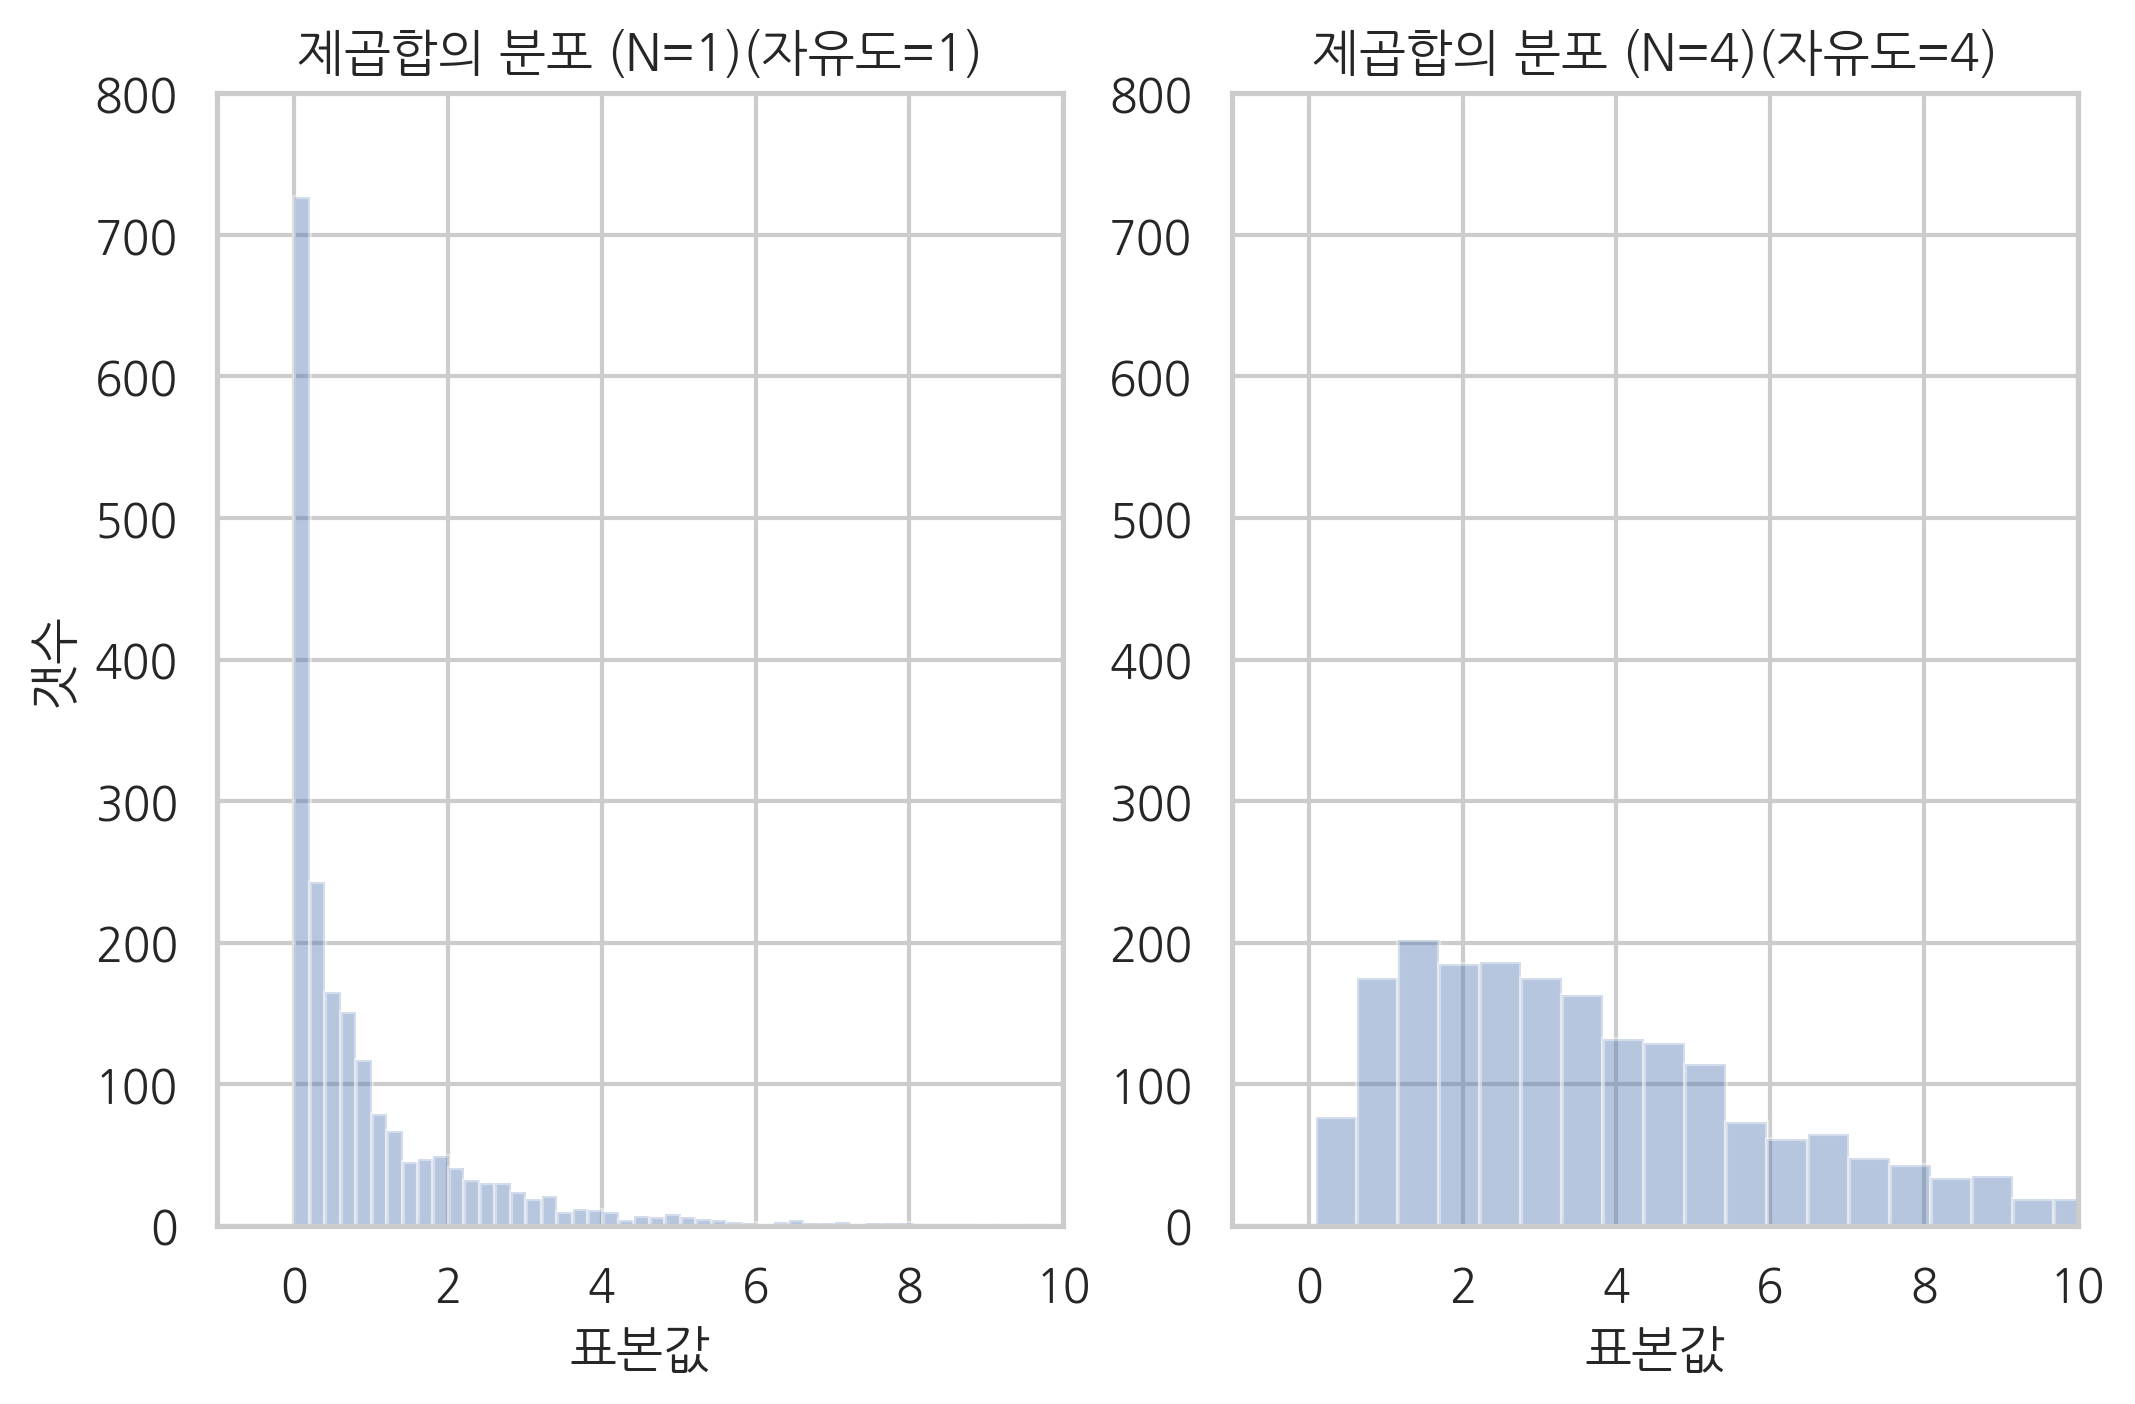

In [239]:
#표본분포를 보자. 
np.random.seed(0)

rv = sp.stats.norm() #(표준)정규분포 객체
M = 2000

plt.subplot(1,2,1)
N=1
x = rv.rvs((N,M)) # 정규분포 표본 5000개
t = (x**2).sum(axis=0) # 정규분포 표본제곱합

sns.distplot(t, kde=False)
plt.xlim(-1,10)
plt.ylim(0,800)
plt.title('제곱합의 분포 (N=1)(자유도=1)')
plt.xlabel('표본값')
plt.ylabel('갯수')

plt.subplot(1,2,2)
N=4
x = rv.rvs((N,M))
t = (x**2).sum(axis=0) #정규분포표본제곱합
sns.distplot(t, kde=False)
plt.xlim(-1,10)
plt.ylim(0,800)
plt.title('제곱합의 분포 (N=4)(자유도=4)')
plt.xlabel('표본값')

plt.show()

# 정규분포의 표본분포에서도 자유도가 2보다 클 때, 
# 0이 아닌 0보다 큰 어떤 값이 가장 자주 발생하였다. 

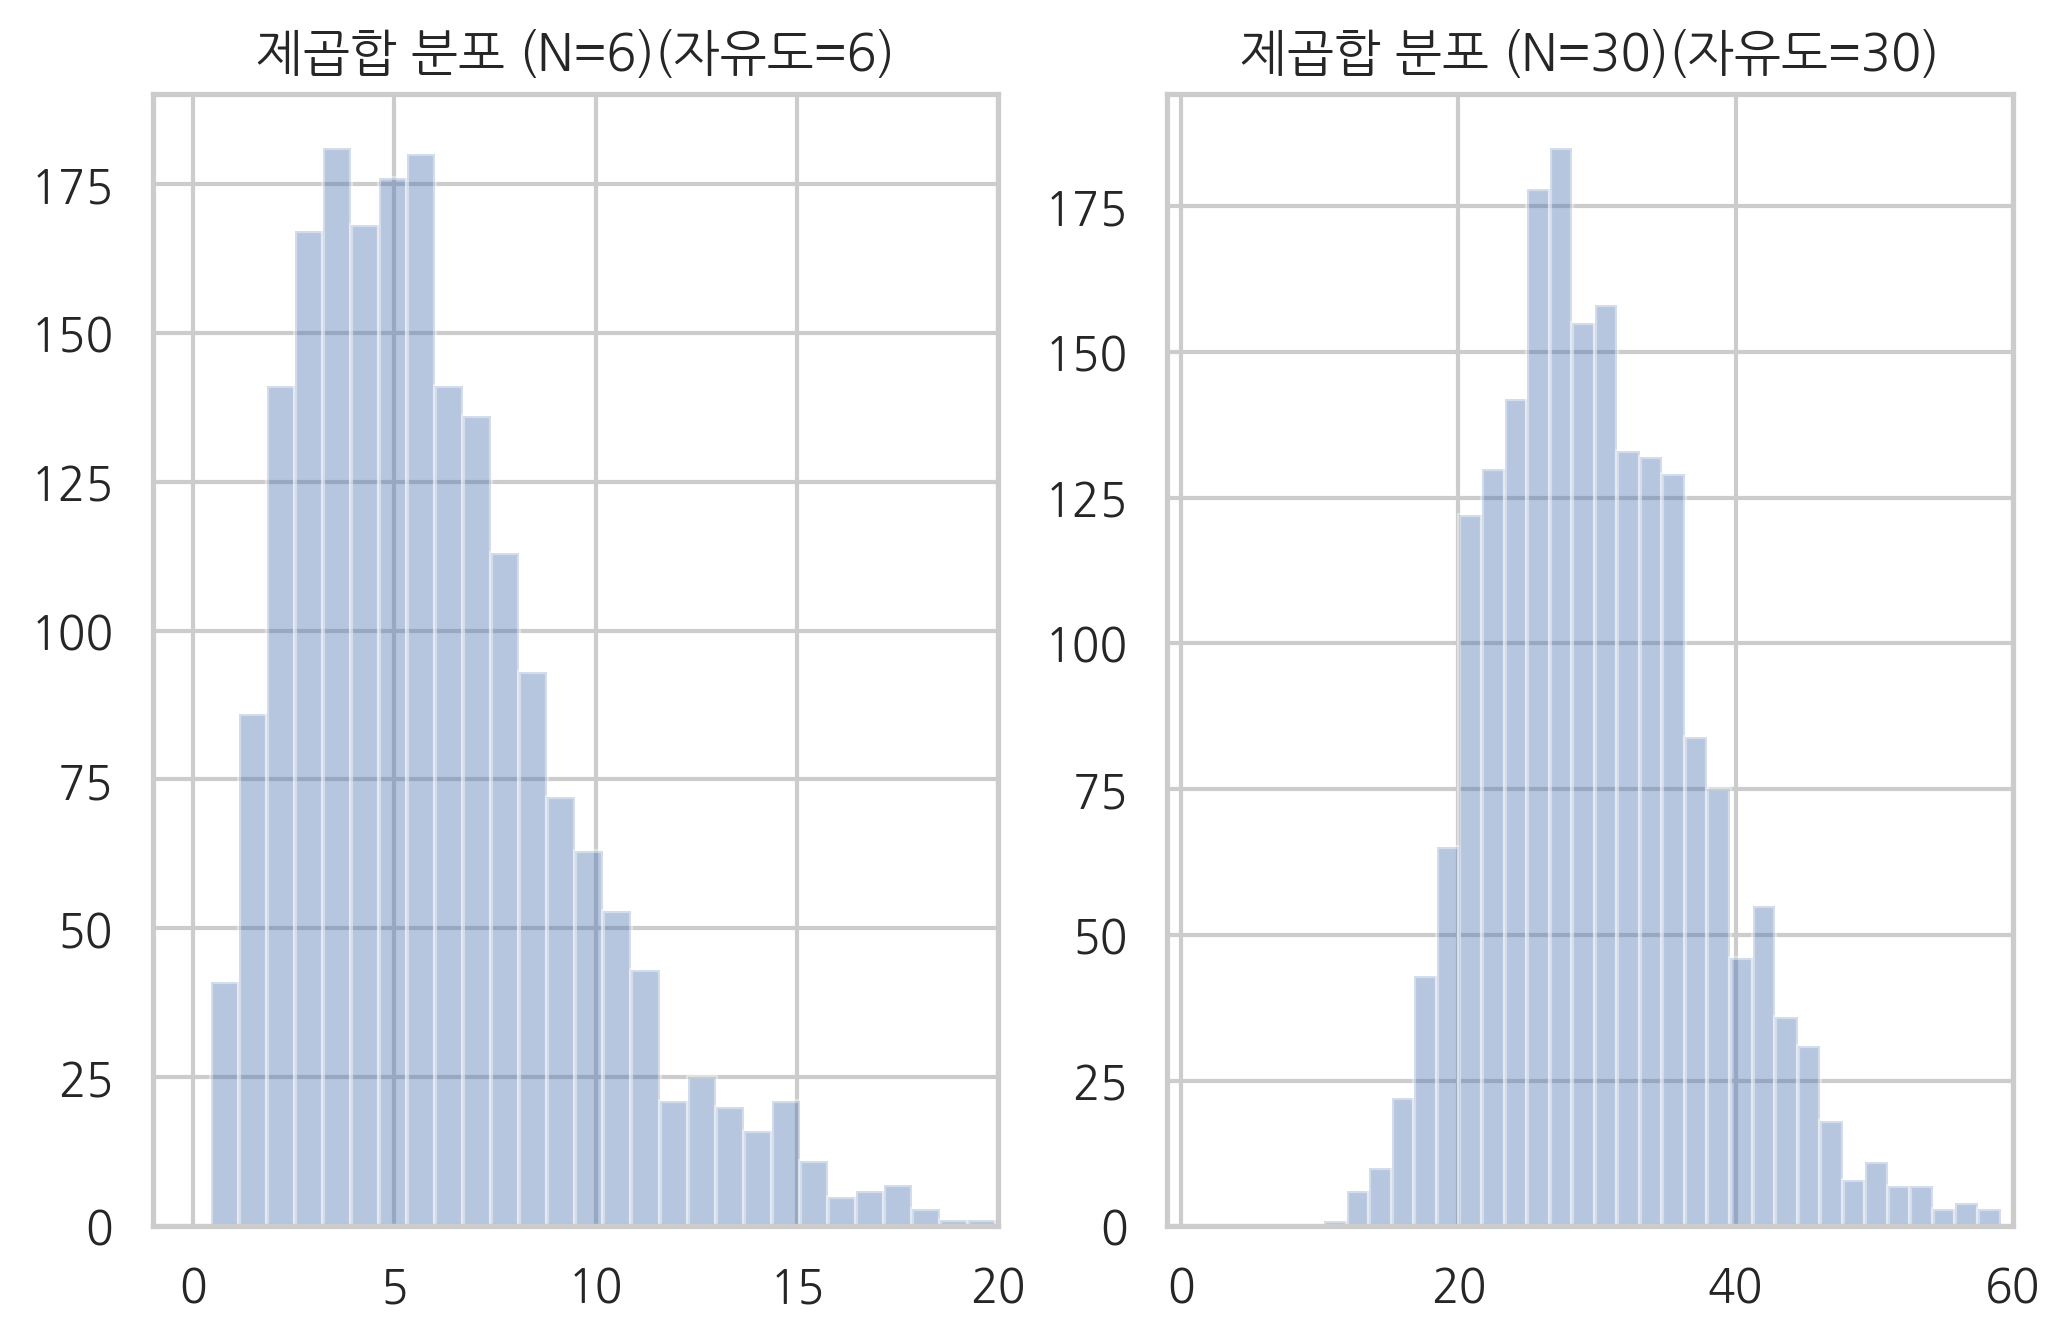

In [274]:
#8.5.1 연습문제  : 위와 같은 현상은 왜 발생할까? 
#1. N=6일 때
rv = sp.stats.norm() #정규분포 객체생성
M=2000

N=6
X = rv.rvs((N,M))
chi2 = (X**2).sum(axis=0) #정규분포 표본제곱합
plt.subplot(1,2,1)
sns.distplot(chi2,kde=False)
plt.xlim(-1,20)
plt.title('제곱합 분포 (N=6)(자유도=6)')

#2.
plt.subplot(1,2,2)
N=30
X = rv.rvs((N,M))
chi2 = (X**2).sum(axis=0)
sns.distplot(chi2,kde=False)
plt.xlim(-1,60)
plt.title('제곱합 분포 (N=30)(자유도=30)')

plt.show()

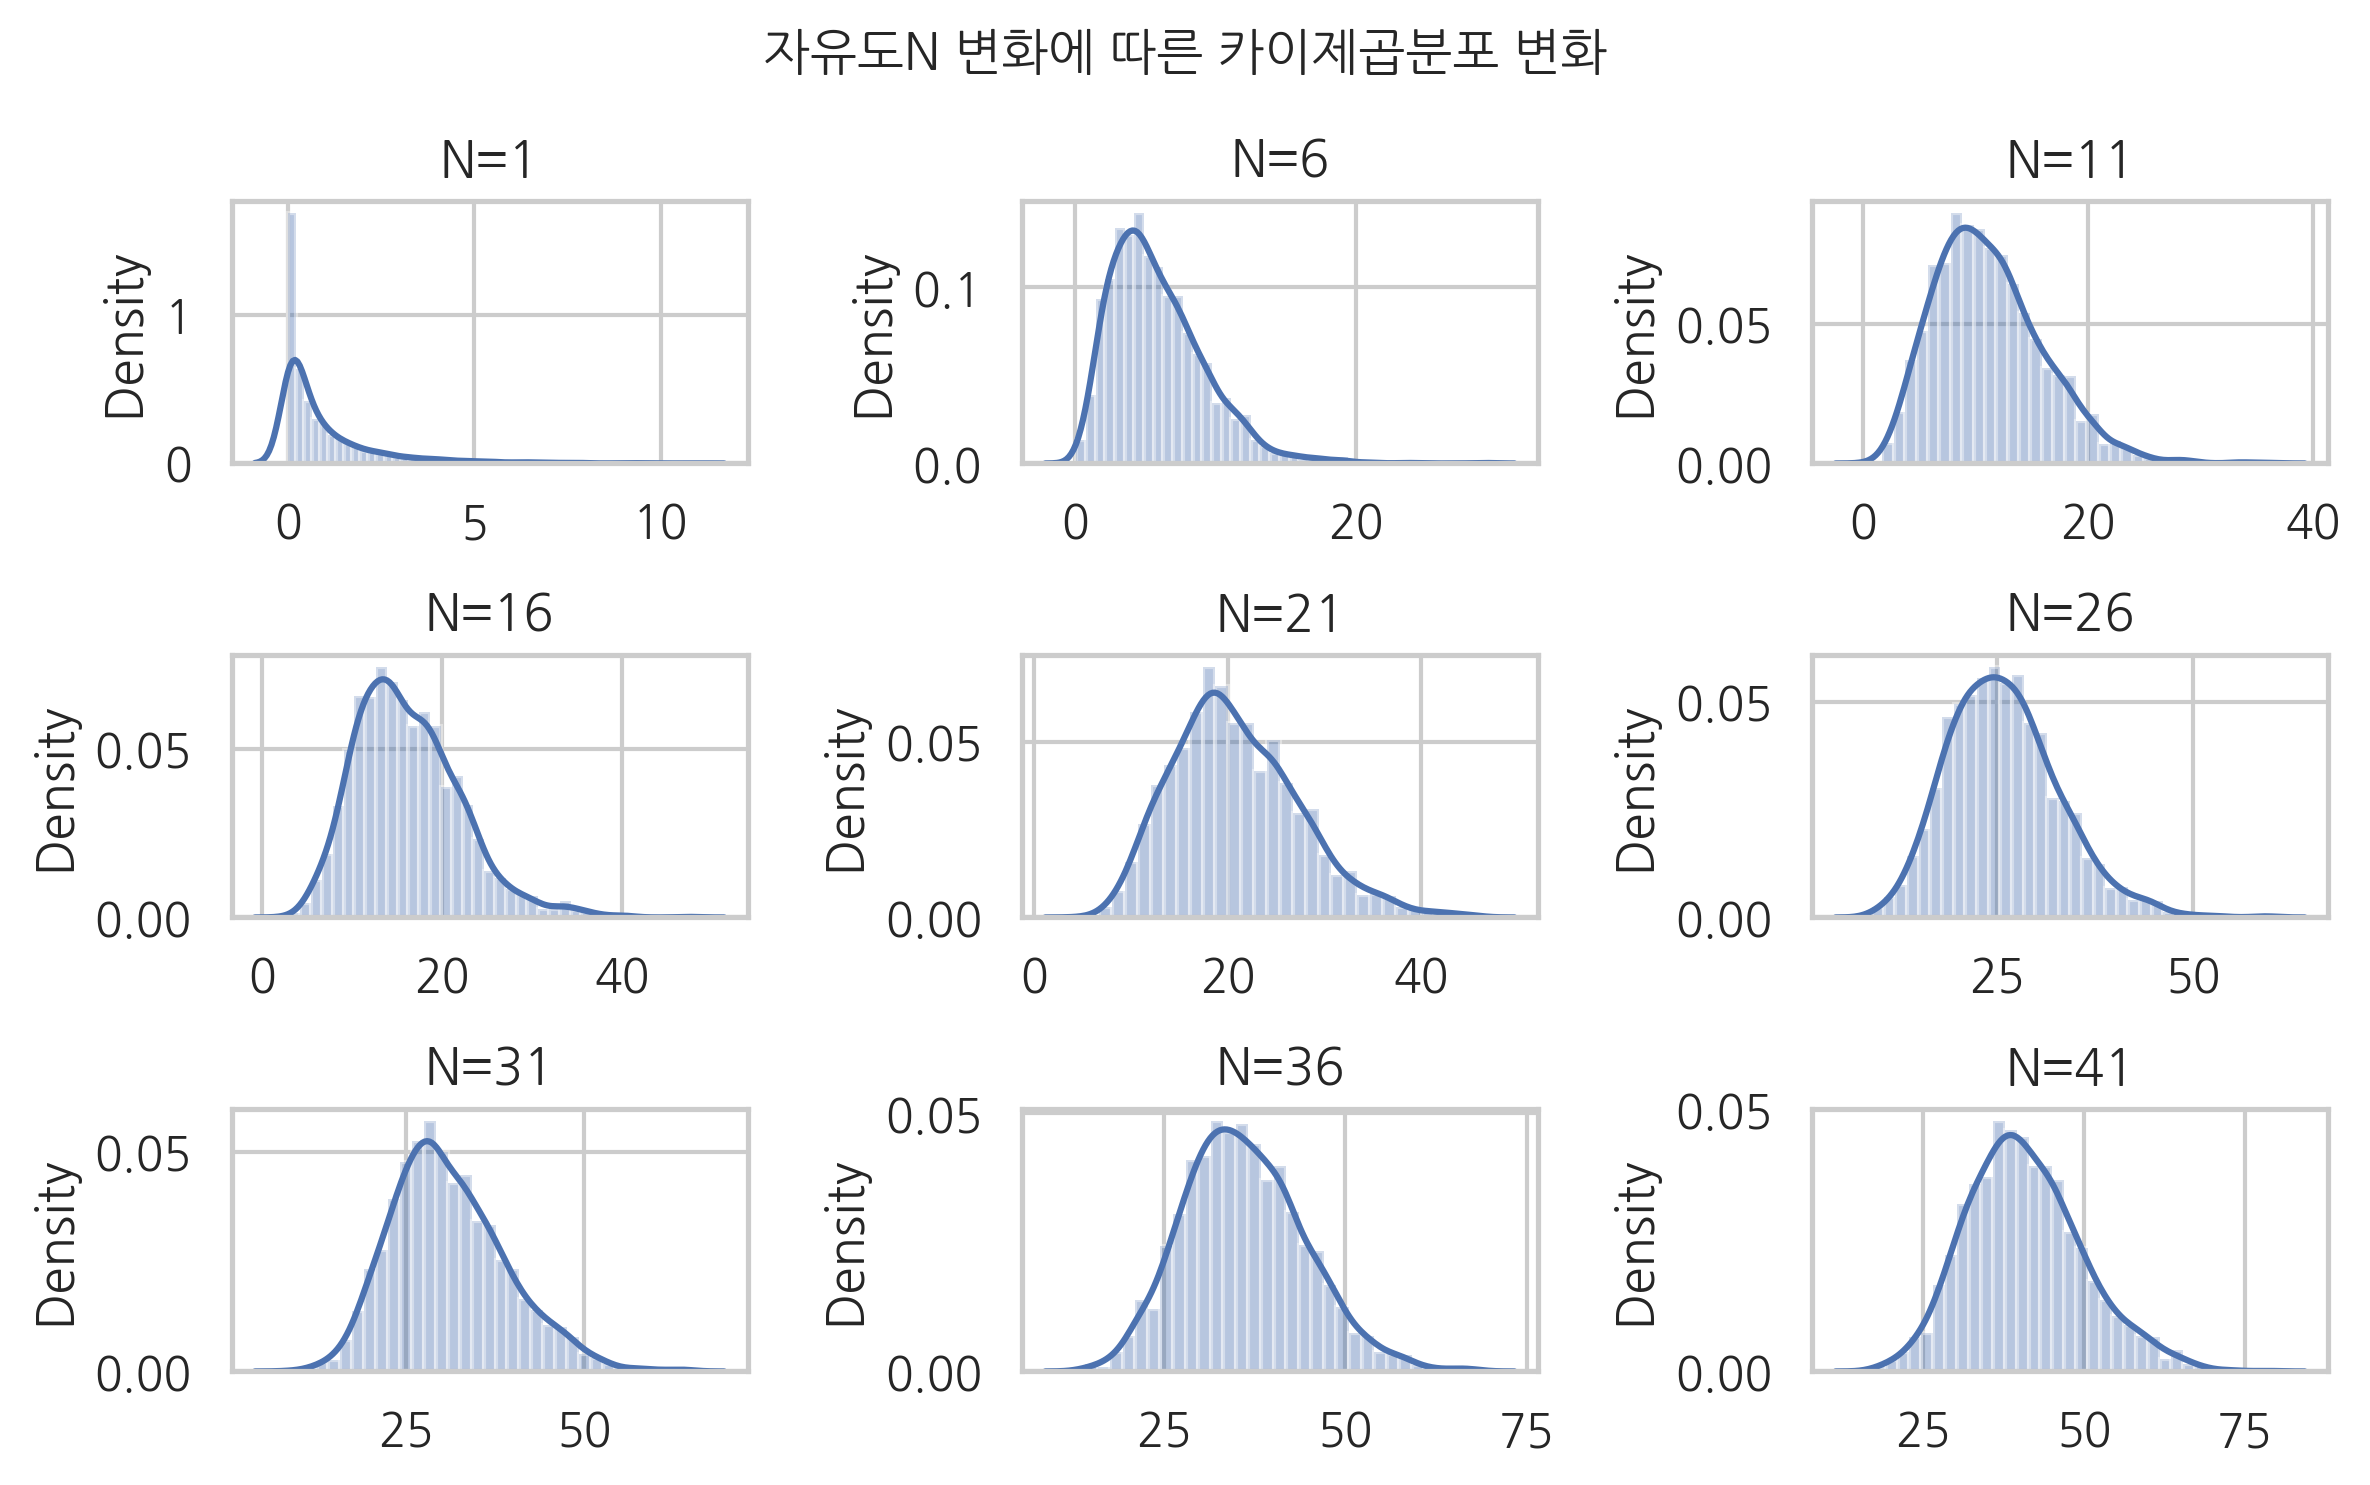

In [279]:
def chi2(N) : 
    M=2000
    rv = sp.stats.norm()
    X = rv.rvs((N,M))
    chi2 = (X**2).sum(axis=0) #정규분포 표본제곱합 값들
    sns.distplot(chi2, kde=True)
    plt.title(f'N={N}')
    
for a,b in zip(range(1,45,5),np.arange(331,340)) : 
    plt.subplot(b)
    chi2(a)
plt.suptitle('자유도N 변화에 따른 카이제곱분포 변화')
plt.tight_layout()
plt.show()

# 카이제곱분포는 중심극한정리 성립한다. 
# 따라서 자유도N이 커질수록 정규분포에 근사하게 된다. 
# 결과적으로 N이 2보다 클 때, 0보다 큰 표본값이 가장 자주나오게 된다. 

+ N이 커질 수록 분포가 오른쪽으로 계속 이동한다.

# F분포
- 카이제곱 분포 따르는 확률변수 2개 각각의 표본을 구한다. 각 표본을 각각의 자유도로 나눈 뒤, 두 결과물의 비율 구하면 F분포 따른다. 
- t통계량 값 제곱해도 F분포 따른다. F(1,N)


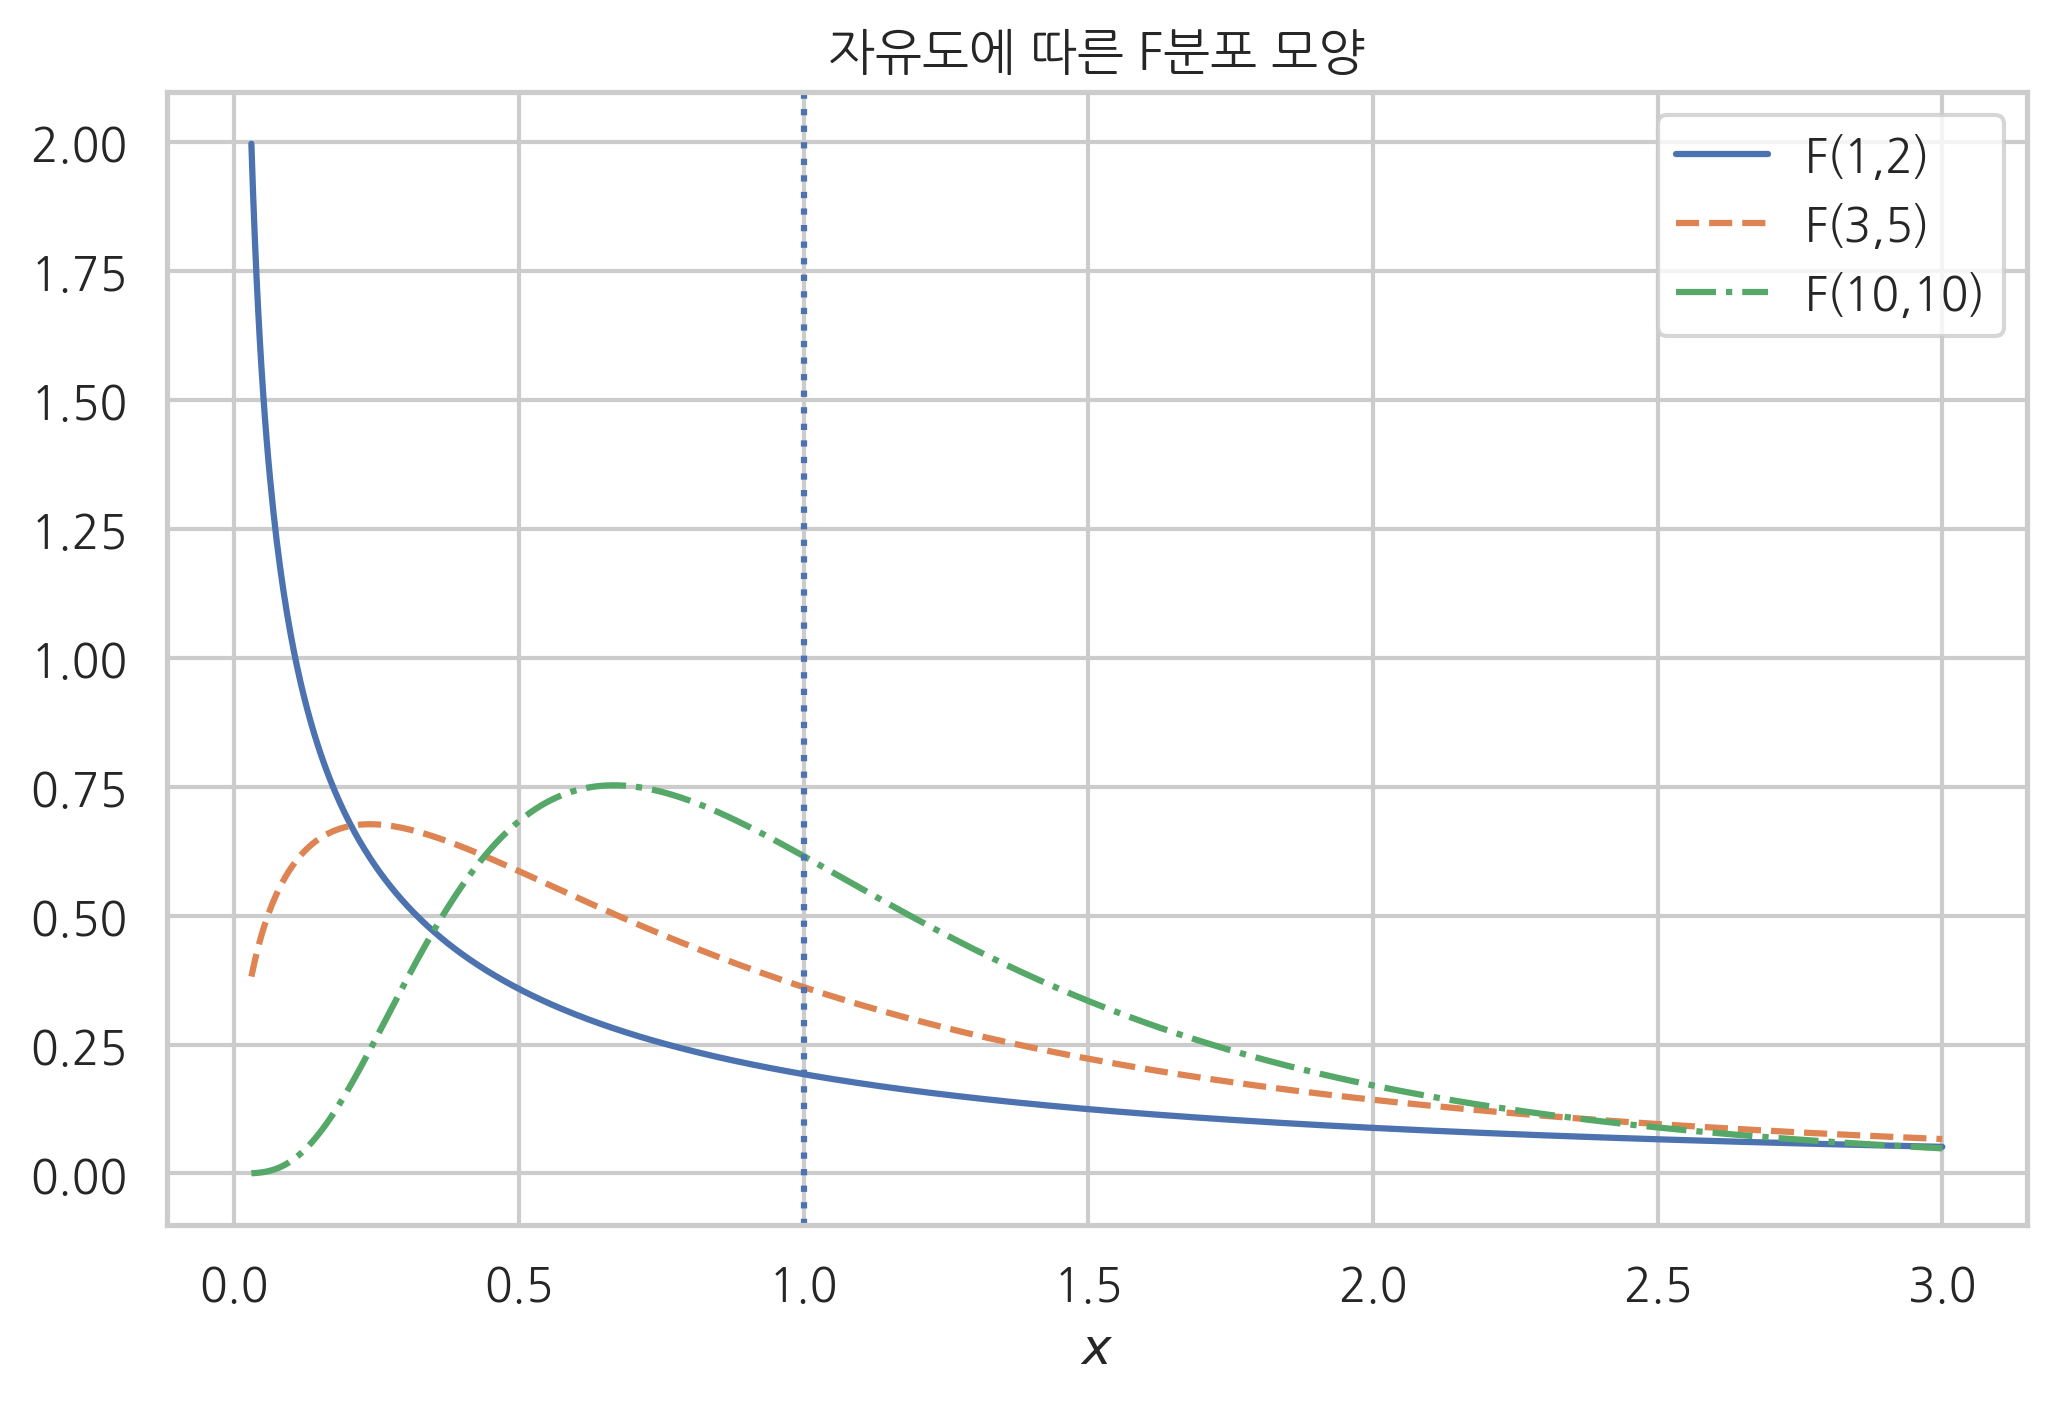

In [282]:
xx = np.linspace(0.03,3,1000)
plt.plot(xx, sp.stats.f(1,2).pdf(xx), ls='-',label='F(1,2)')
plt.plot(xx, sp.stats.f(3,5).pdf(xx), ls='--',label='F(3,5)')
plt.plot(xx, sp.stats.f(10,10).pdf(xx),ls='-.',label='F(10,10)')

plt.axvline(1,ls=':')
plt.xlabel('$x$')
plt.title('자유도에 따른 F분포 모양')
plt.legend()
plt.show()

# F분포의 표본분포

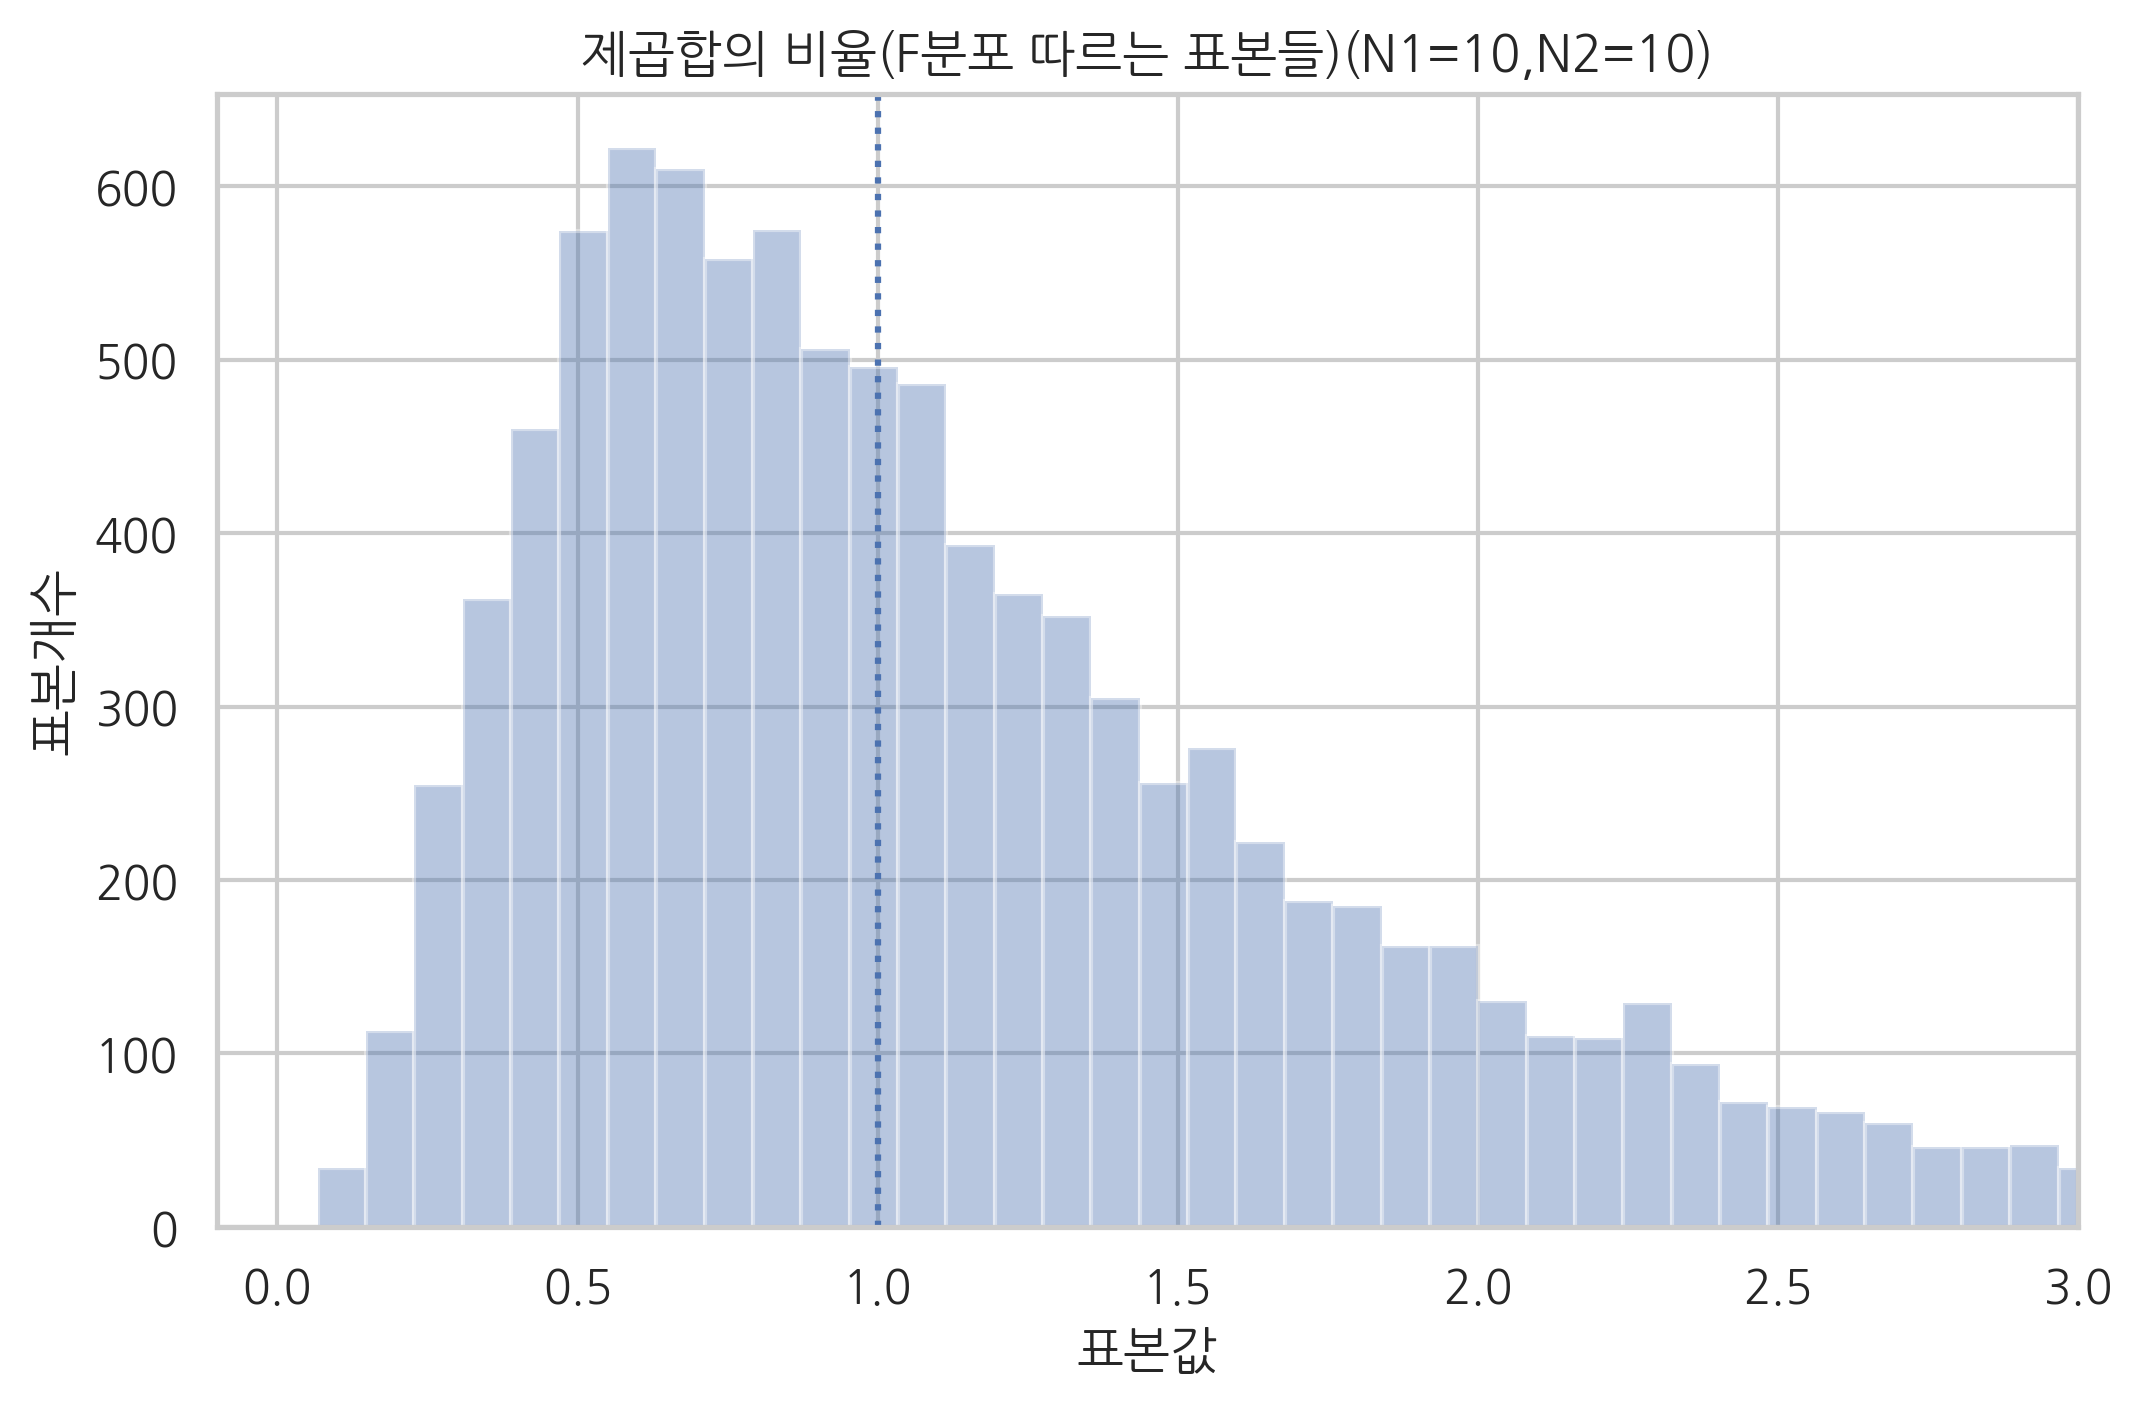

In [309]:
np.random.seed(0)

rv = sp.stats.norm() #정규분포
M=10000

N1=10
x1=rv.rvs((N1,M)) 
x1 = ((x1**2).sum(axis=0))/N1 

N2=10
x2=rv.rvs((N2,M))
x2 = ((x2**2).sum(axis=0))/N2

t = x2/x1 #F분포 표본
sns.distplot(t, kde=False,bins=200)
plt.axvline(1,ls=':')
plt.xlim(-0.1,3)
plt.title('제곱합의 비율(F분포 따르는 표본들)(N1=10,N2=10)')
plt.xlabel('표본값')
plt.ylabel('표본개수')
plt.show()

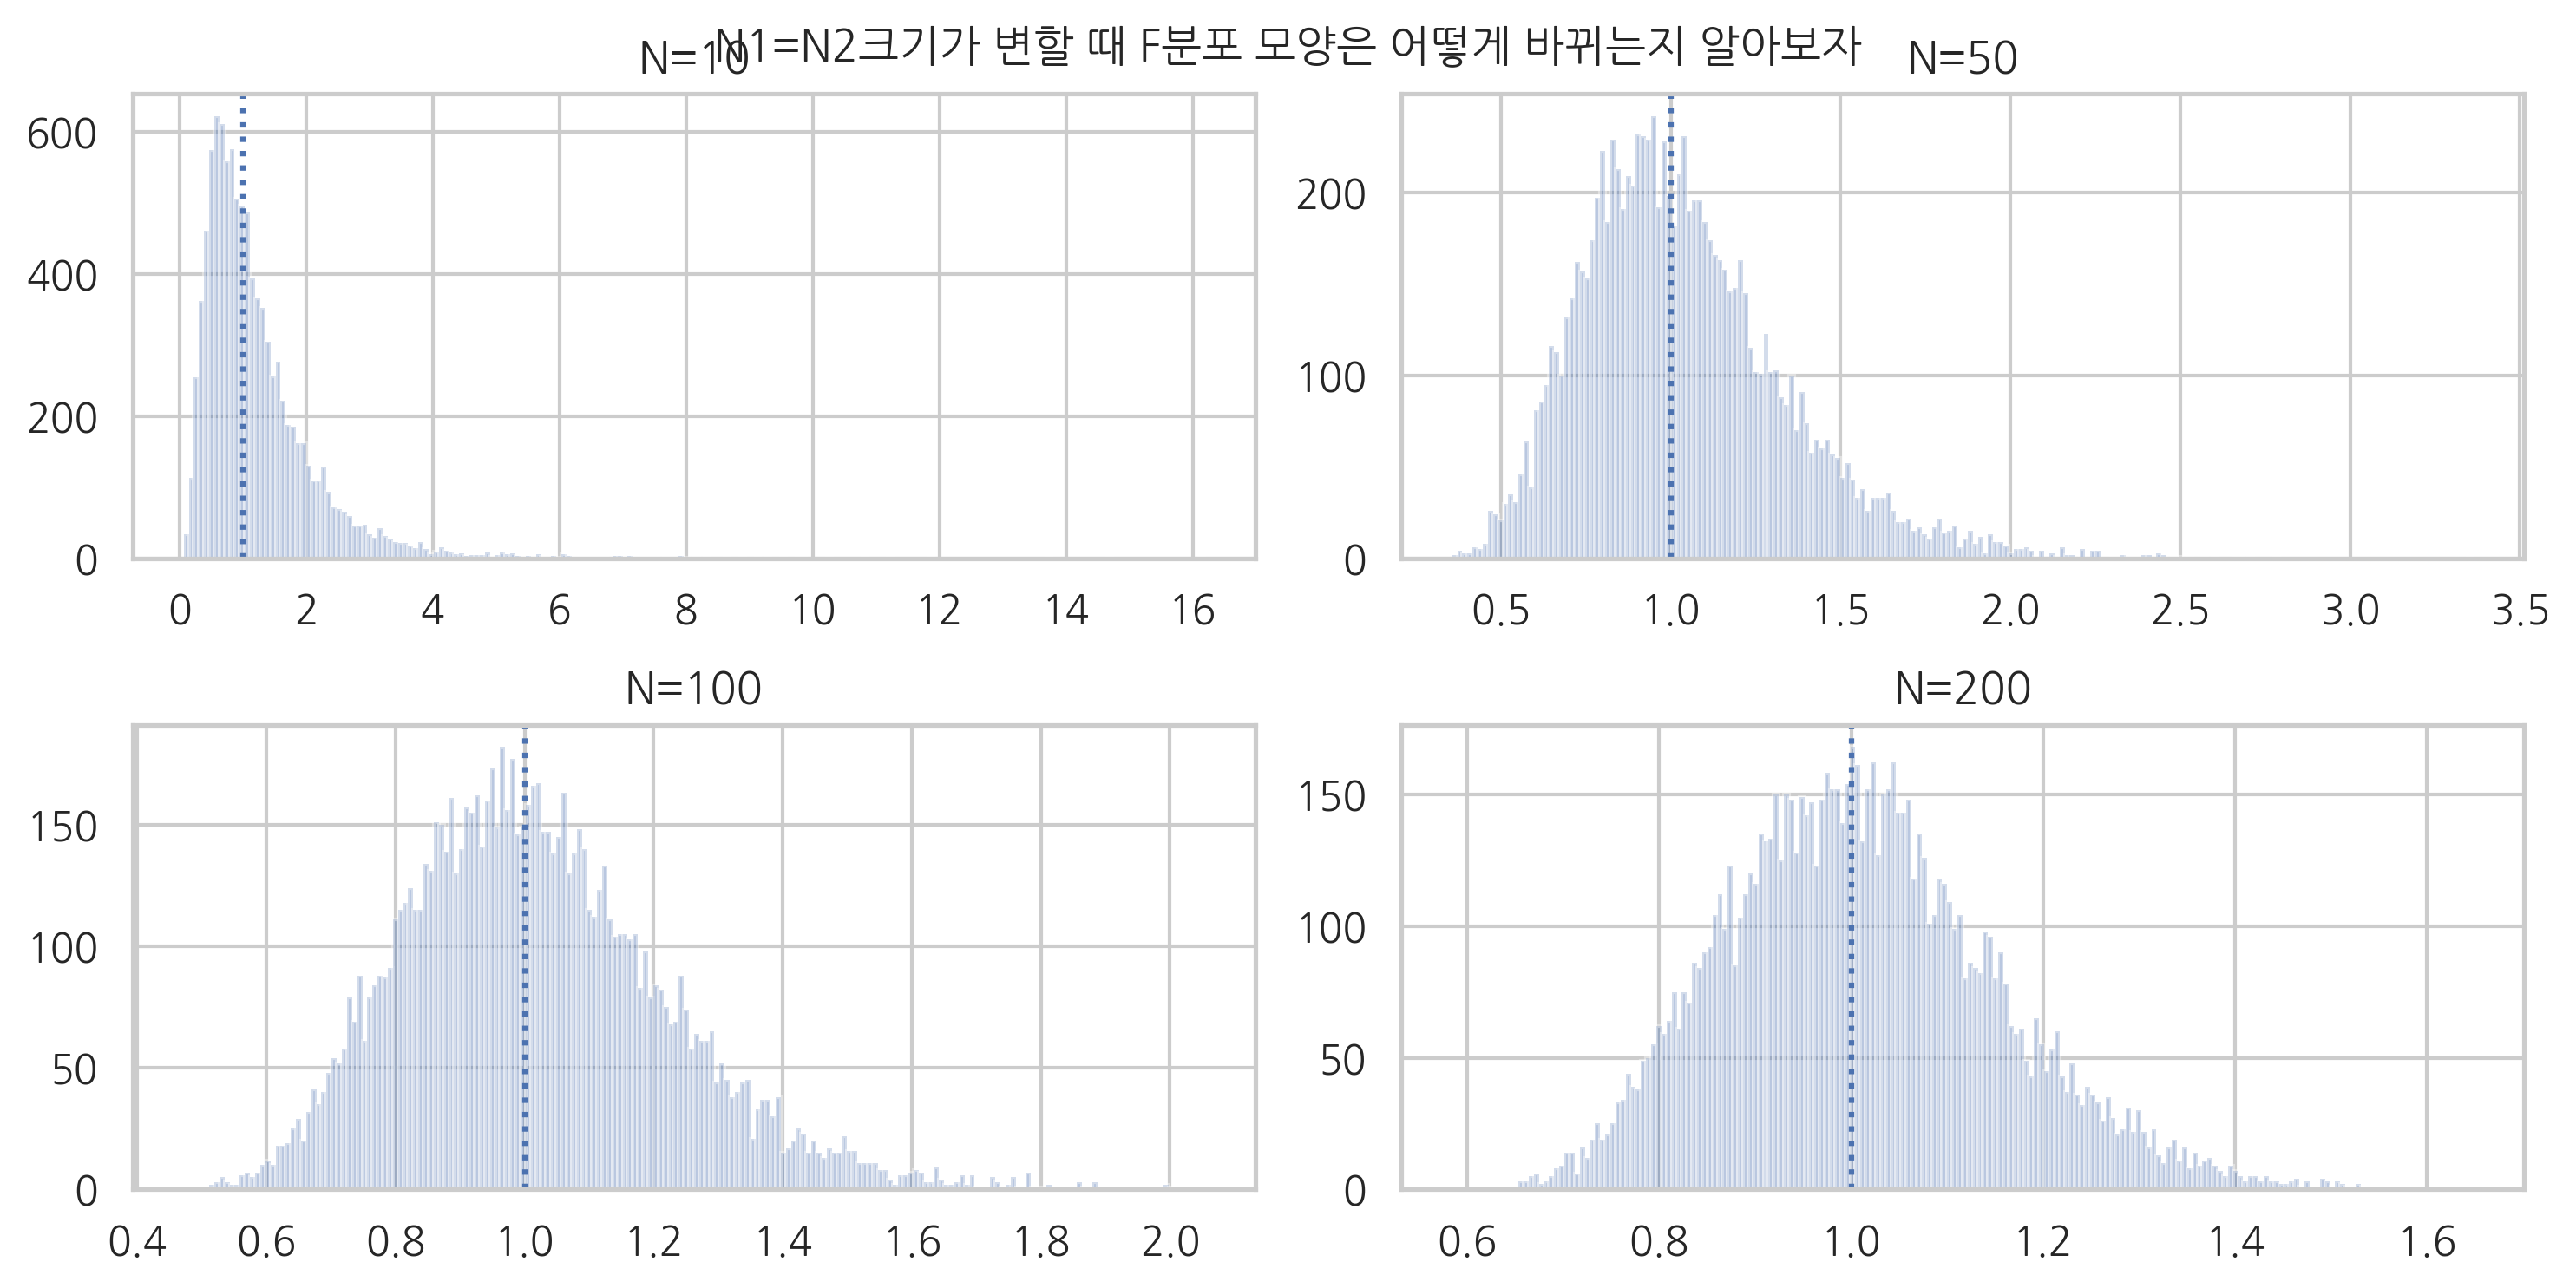

In [378]:
# 다시해보기 
np.random.seed(0)
plt.figure(figsize=(10,5))
rv = sp.stats.norm() #정규분포

def F(N) : 
    M=10000
    x1 = rv.rvs((N,M))
    t1 = (x1**2).sum(axis=0)/N
    
    x2 = rv.rvs((N,M))
    t2 = (x2**2).sum(axis=0)/N
    
    t = t2/t1
    sns.distplot(t, kde=False, bins=200)
    plt.axvline(1,ls=':')
    

for a,b in zip([10,50,100,200],np.arange(221,225)) : 
    plt.subplot(b)
    plt.title(f'N={a}')
    F(a)

plt.tight_layout()
plt.suptitle('N1=N2크기가 변할 때 F분포 모양은 어떻게 바뀌는지 알아보자')
plt.show()

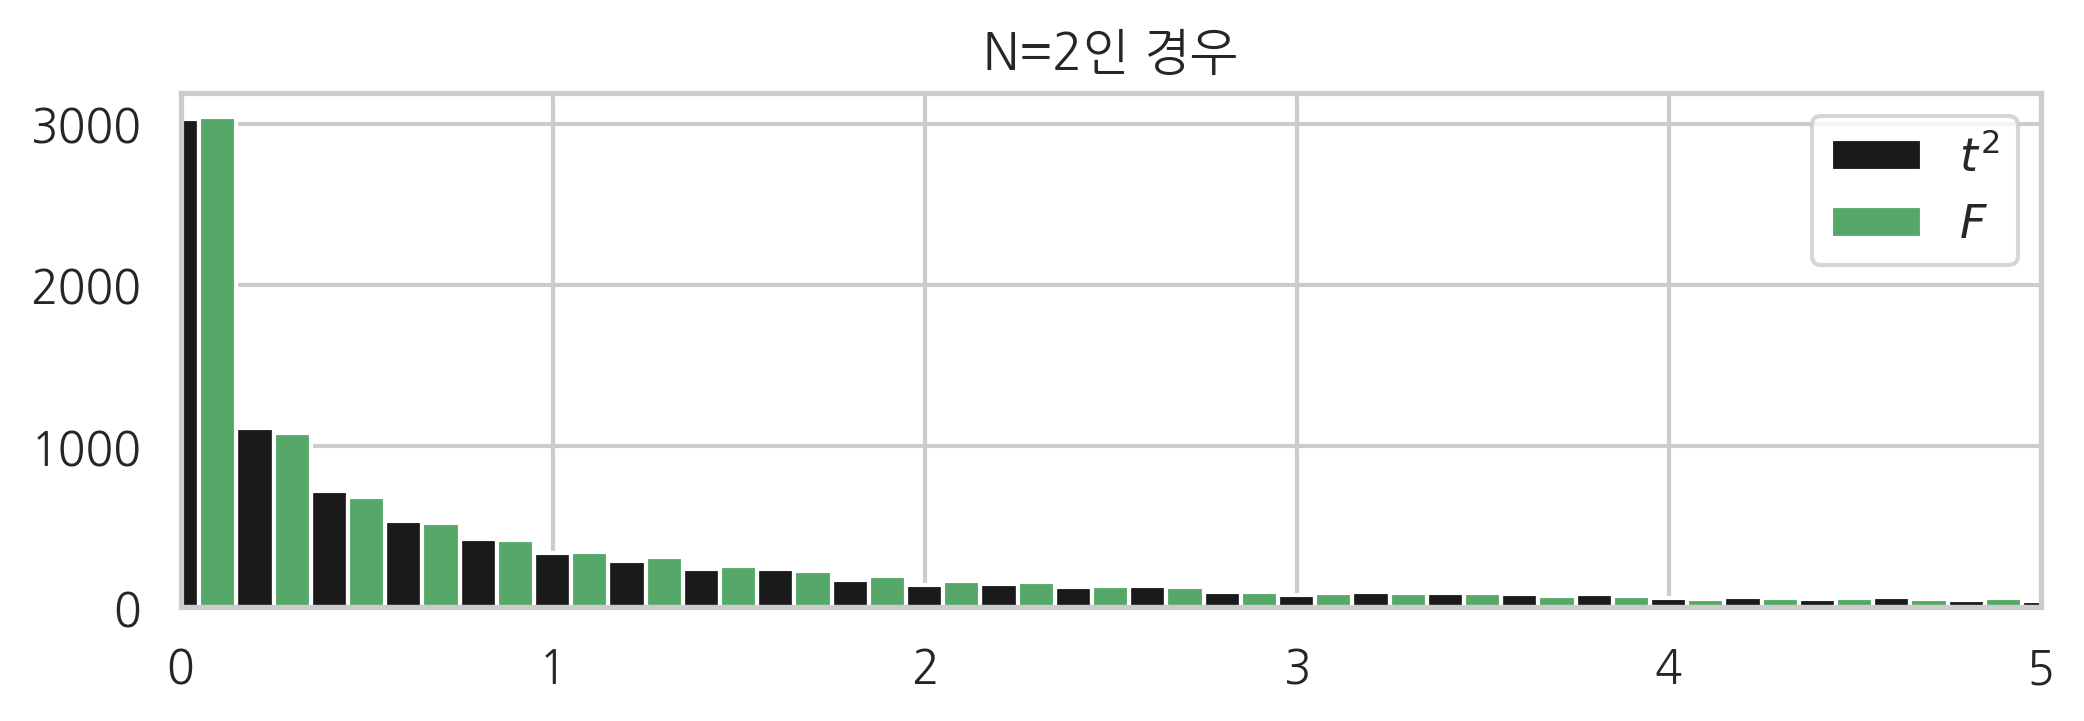

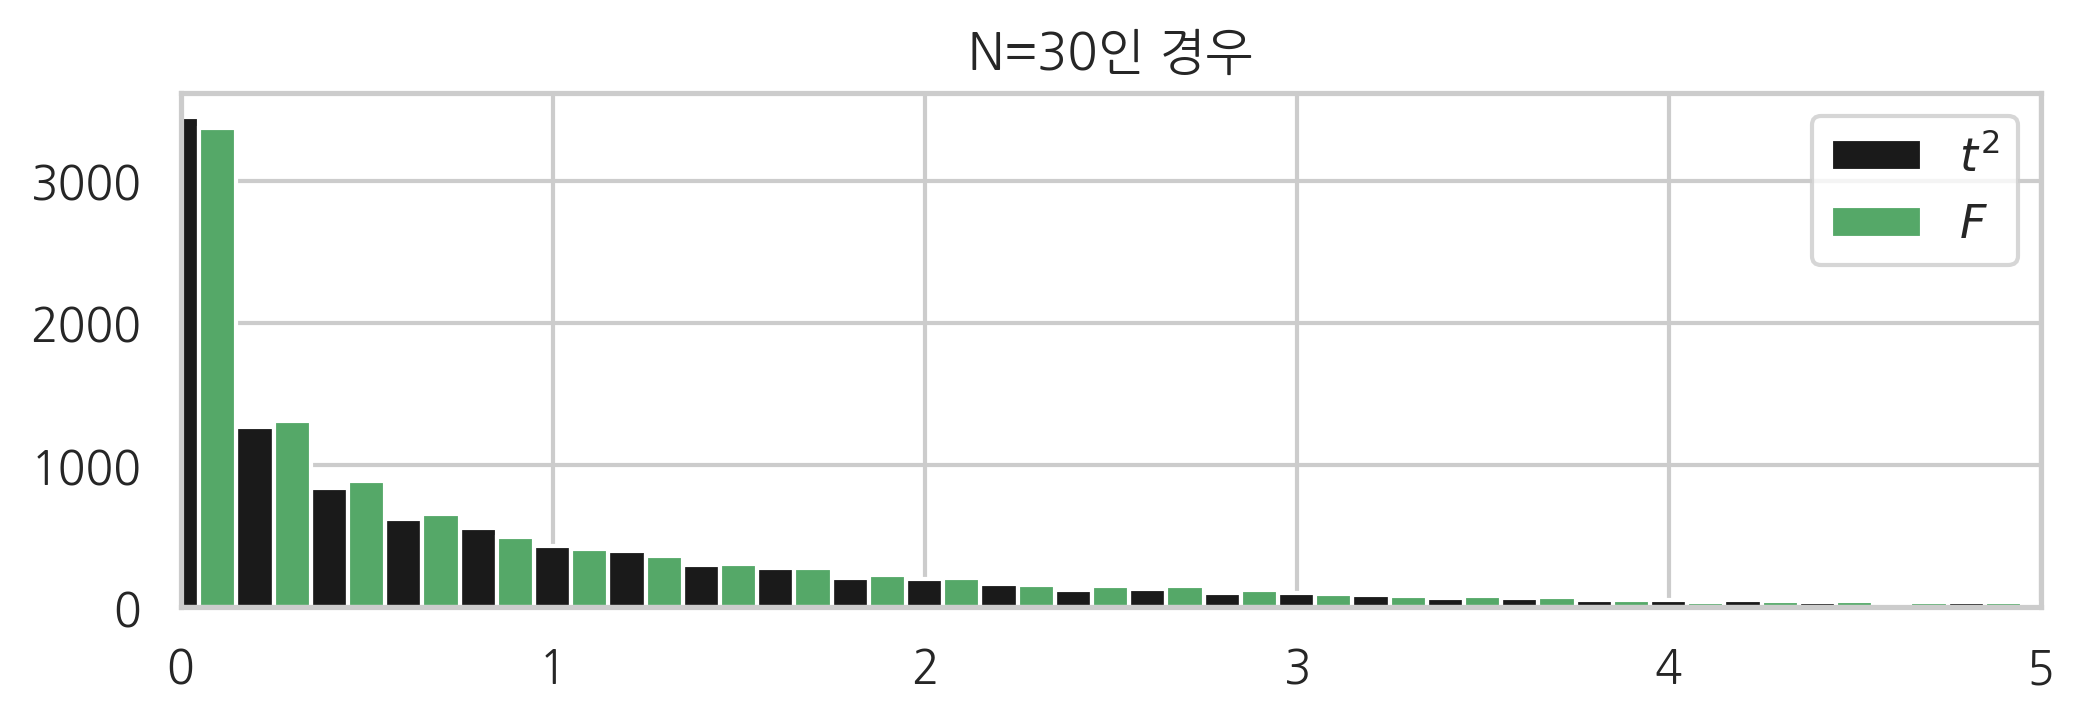

In [506]:
# 8.5.2 연습문제 
np.random.seed(0)
#1. 
def t2_f(N) : 
    t2 = sp.stats.t(N).rvs(10000)**2
    f = sp.stats.f(1,N).rvs(10000)
    plt.hist(t2, range=(0,10), bins=50, align='left', color='k',rwidth=0.5, label='$t^{2}$')
    plt.hist(f, range=(0,10),bins=50, align='mid',color='g',rwidth=0.5, label='$F$')
    plt.xlim(0,5)
    plt.legend()
    plt.title('N={}인 경우'.format(N))
    plt.show()
plt.subplot(211)
t2_f(2)
plt.subplot(212)
t2_f(30)

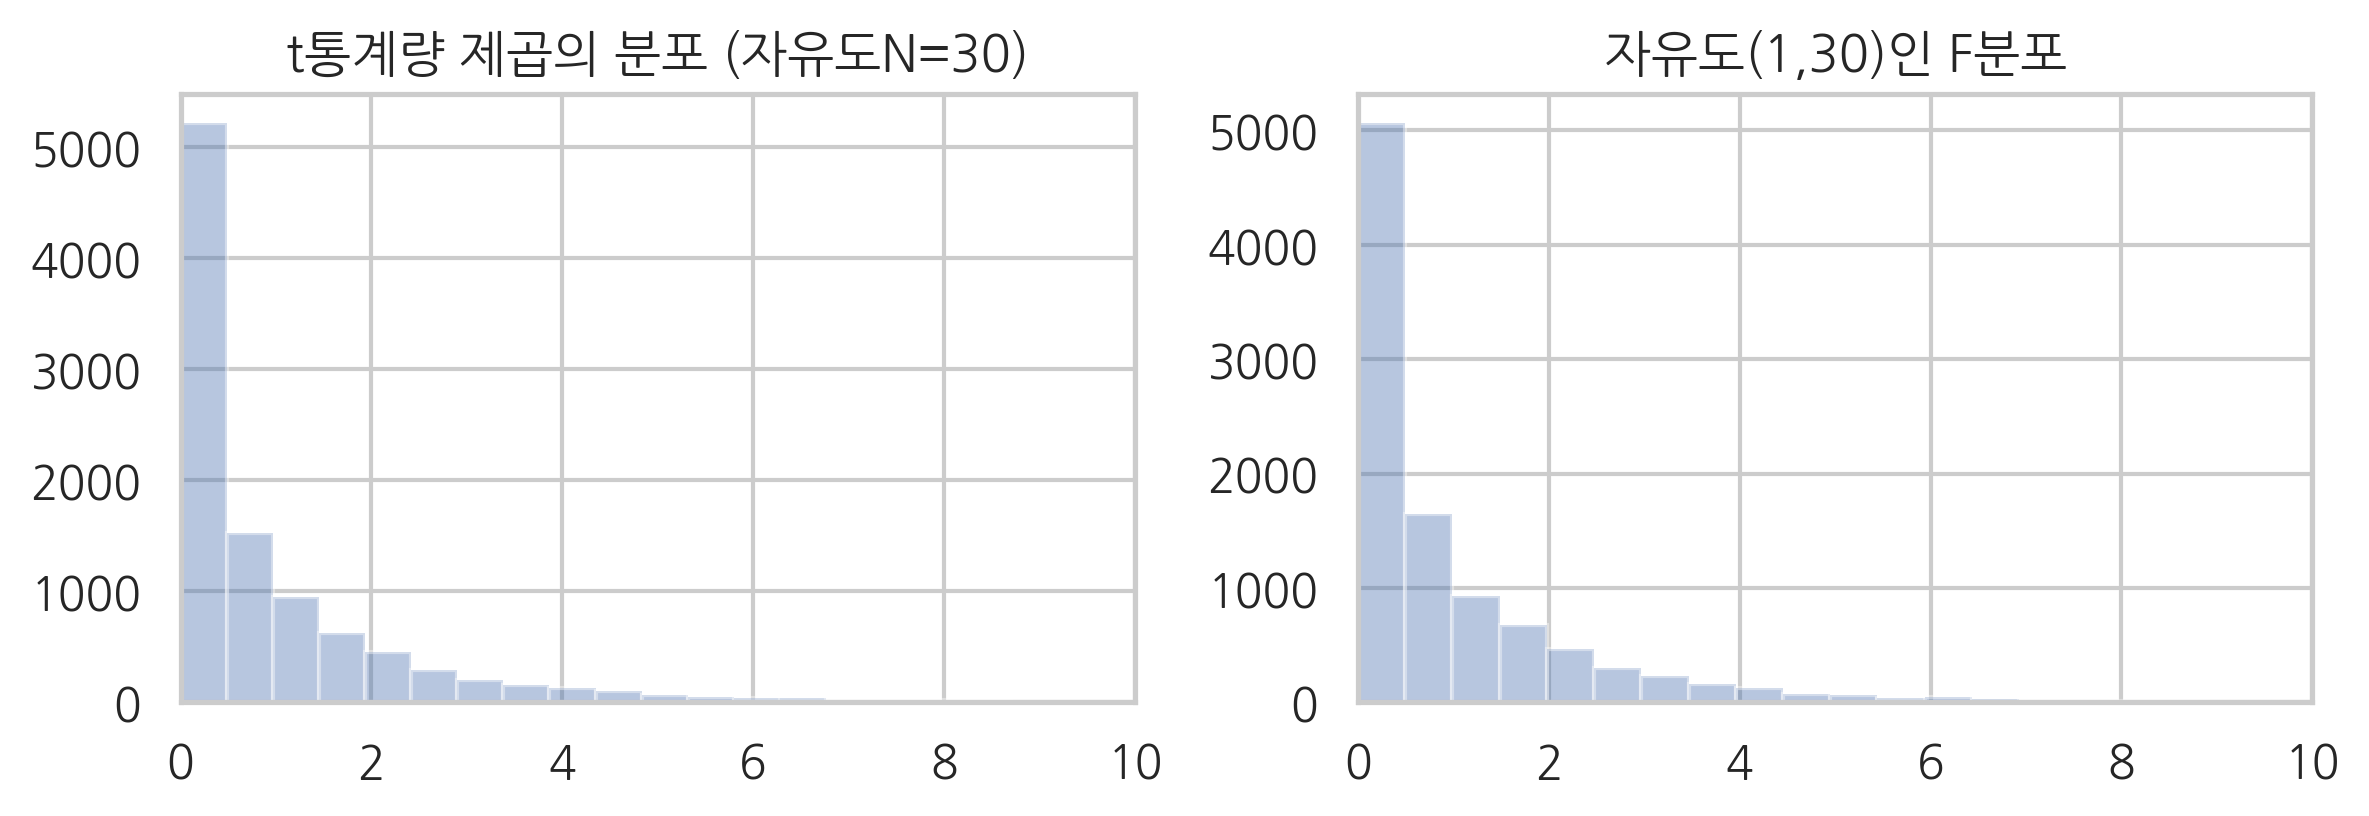

In [508]:
#2. N=30
np.random.seed(0)

t = sp.stats.t(df=30)
t1 = t.rvs(10000)**2
plt.subplot(221)
plt.xlim(0,10)
plt.title('t통계량 제곱의 분포 (자유도N=30)')
sns.distplot(t1, kde=False)

plt.subplot(222)
f = sp.stats.f(1,30)
f1 = f.rvs(10000)
plt.xlim(0,10)
plt.title('자유도(1,30)인 F분포')
sns.distplot(f1, kde=False)

plt.tight_layout()
plt.show()

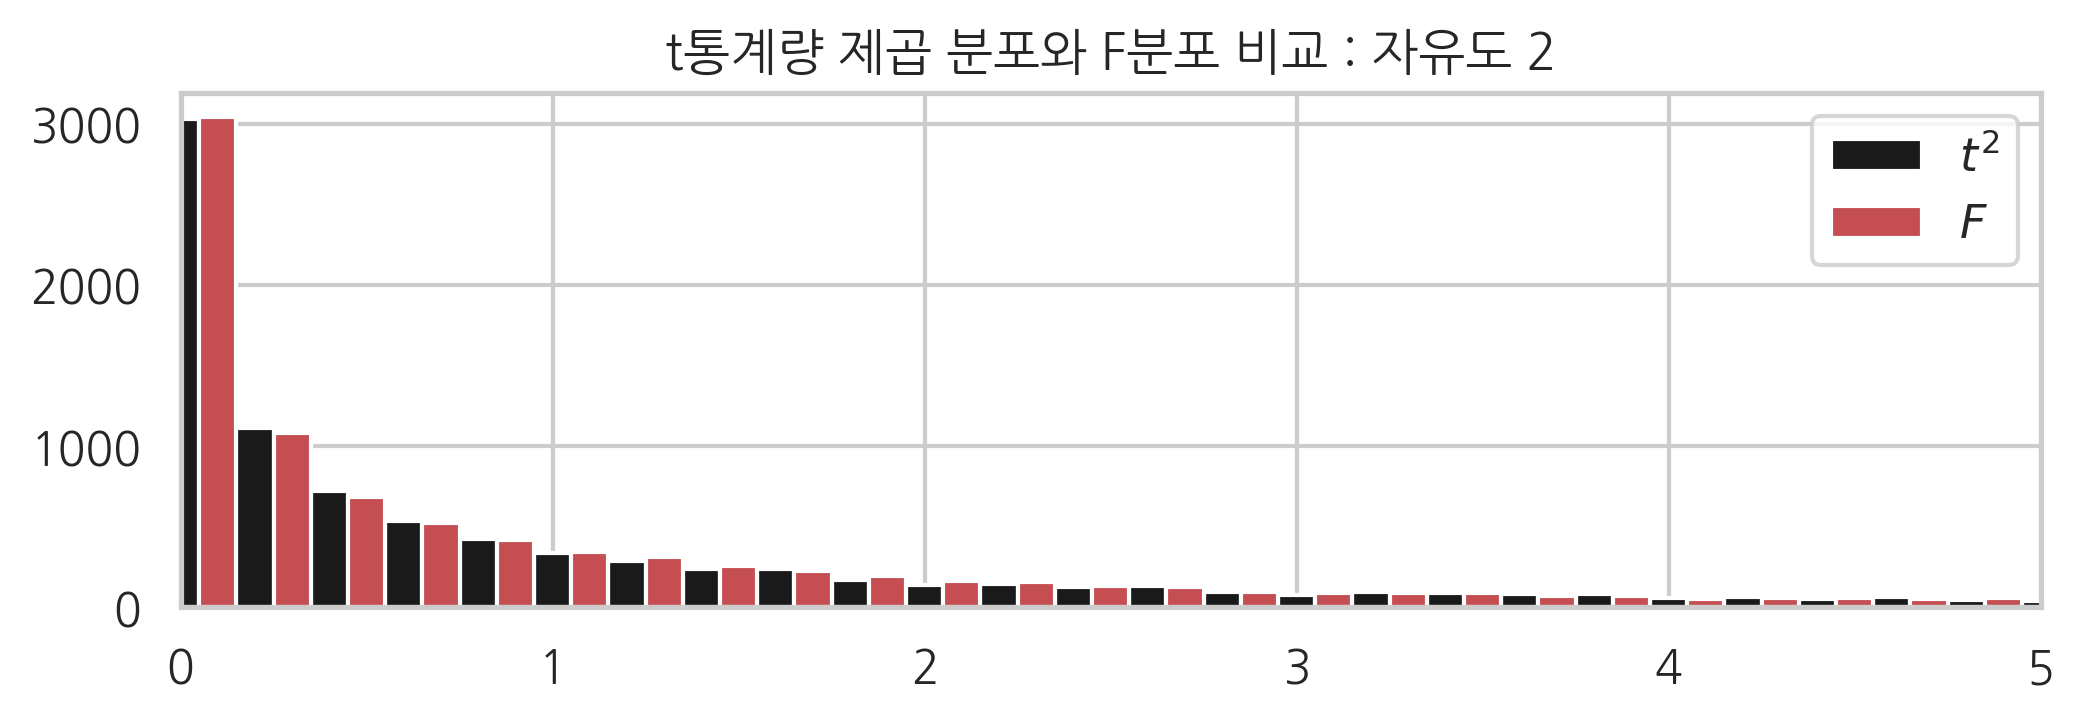

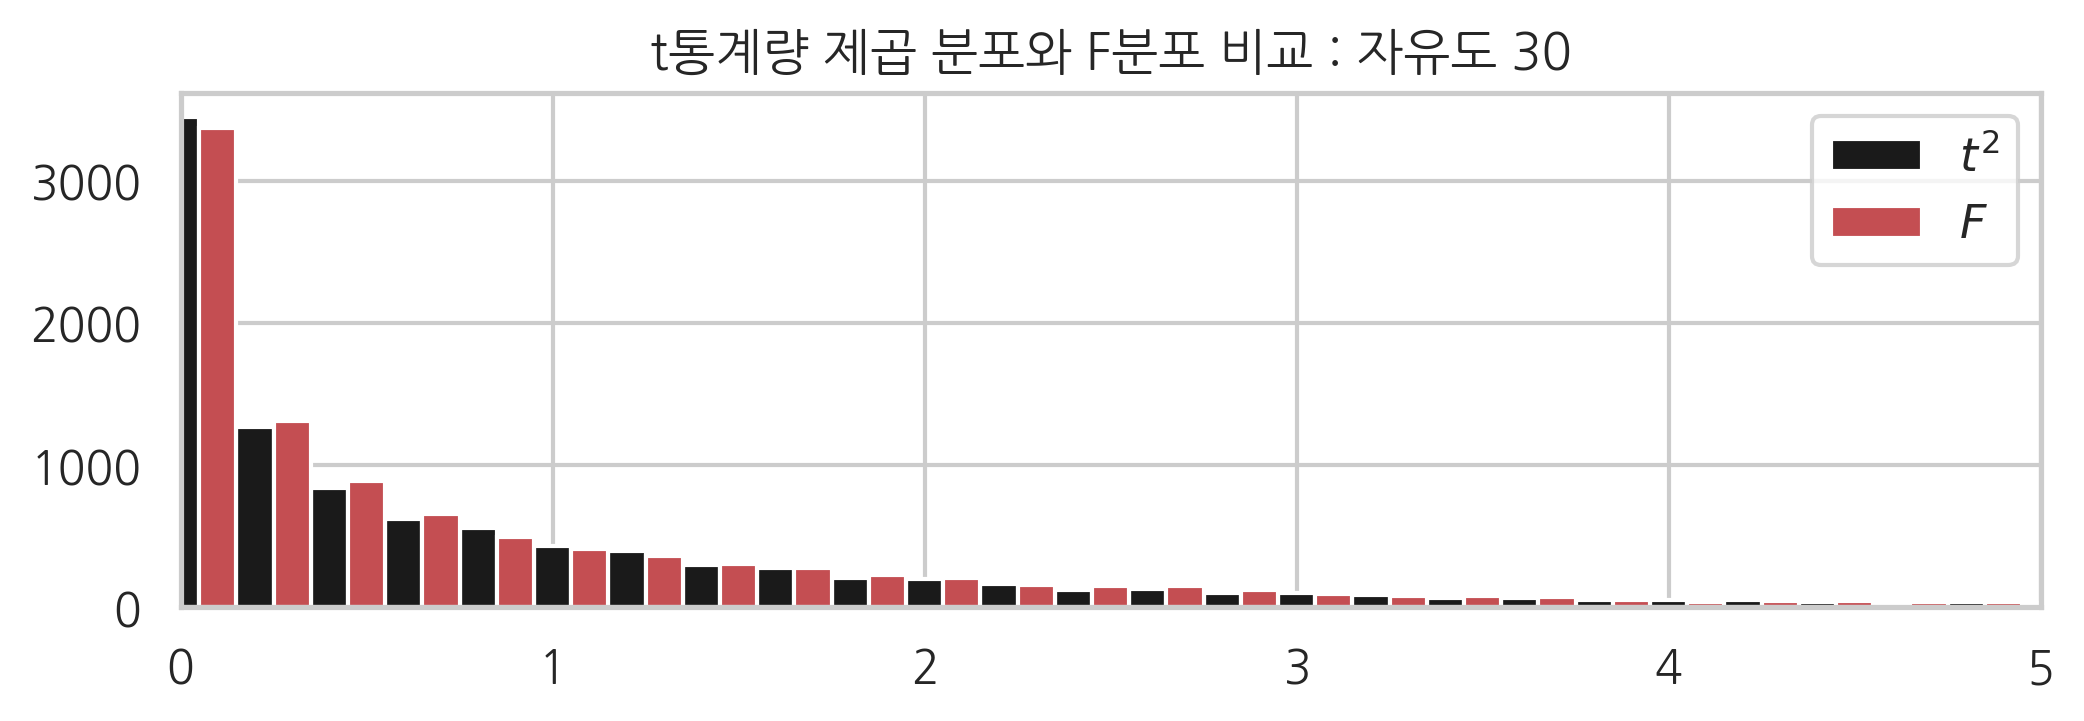

In [27]:
np.random.seed(0)
N=2
def t2_f(N) : 
    rv = sp.stats.t(df=N)
    t = rv.rvs(10000)**2
    plt.hist(t, range=(0,10),rwidth=0.5, bins=50, color='k',align='left',label='$t^{2}$')
    plt.title('t통계량 제곱 분포와 F분포 비교 : 자유도 {}'.format(N))
    plt.xlim(0,5)
    
    rv = sp.stats.f(1,N)
    f = rv.rvs(10000)
    plt.hist(f, range=(0,10), rwidth=0.5, bins=50, color='r', align='mid', label='$F$')
    plt.legend()
    plt.title('t통계량 제곱 분포와 F분포 비교 : 자유도 {}'.format(N))
    plt.xlim(0,5)
    plt.show()
    
plt.subplot(211)
t2_f(2)
plt.subplot(212)
t2_f(30)